## Team Work 
      Abdelaziz Mohamed Abdelaziz Afify Zeyada 20240415

## Project Description
This project focuses on building a machine learning regression system to predict house prices using the Ames Housing dataset. The workflow begins with data loading and exploratory data analysis to understand the structure, features, and missing values within the dataset.

During the data preprocessing stage, irrelevant columns were removed, duplicate records were dropped, and missing values were handled using appropriate statistical techniques (mode for categorical features and median for numerical features). Categorical variables were encoded using Label Encoding, and numerical features were analyzed for outliers using the Interquartile Range (IQR) method.

Several regression models were trained and compared, including Decision Tree Regressor, Random Forest Regressor, K-Nearest Neighbors Regressor, Support Vector Regressor (SVR), and XGBoost Regressor. Feature importance analysis was performed to identify the most influential variables affecting house prices.

The dataset was split into training and testing sets, and GridSearchCV was used to optimize hyperparameters for selecting the best-performing model. Model performance was evaluated using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.

Finally, the best model was saved for deployment, and a Streamlit web interface was developed to allow users to input house features and receive real-time price predictions, making the model practical and user-friendly.

# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Insert Data

In [2]:
data = pd.read_csv(r"D:\Courses\Projects\Housing Price\AmesHousing.csv")
df = pd.DataFrame(data)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Data Review

In [3]:
df = df.drop(columns=["Order"])
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
df.drop(columns=["Alley" , "Pool QC" , "Fence" , "Misc Feature" , "Mas Vnr Type" , "Fireplace Qu"] , inplace=True)
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [8]:
df.isna().sum().head(50)

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [9]:
df.isna().sum().tail(27)

Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
Paved Drive         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
dtype: int64

# Data Preprocessing

In [10]:
le = LabelEncoder()
encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
        le_col = LabelEncoder()
        df[col] = le_col.fit_transform(df[col])
        encoders[col] = le_col

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   int64  
 6   Lot Shape        2930 non-null   int64  
 7   Land Contour     2930 non-null   int64  
 8   Utilities        2930 non-null   int64  
 9   Lot Config       2930 non-null   int64  
 10  Land Slope       2930 non-null   int64  
 11  Neighborhood     2930 non-null   int64  
 12  Condition 1      2930 non-null   int64  
 13  Condition 2      2930 non-null   int64  
 14  Bldg Type        2930 non-null   int64  
 15  House Style      2930 non-null   int64  
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [12]:
df.isna().sum().head(50)

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [13]:
df.isna().sum().tail(27)

Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type         0
Garage Yr Blt     159
Garage Finish       0
Garage Cars         1
Garage Area         1
Garage Qual         0
Garage Cond         0
Paved Drive         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
dtype: int64

In [14]:
for col in df.columns:
    if df[col].dtype != "object":
        if (col in df.isnull().sum()) != 0:
            df[col] = df[col].fillna(df[col].median())

In [15]:
df.isna().sum().head(50)

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

In [16]:
df.isna().sum().tail(27)

Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
dtype: int64

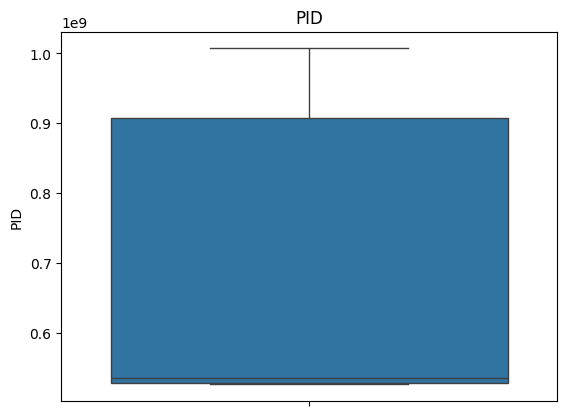

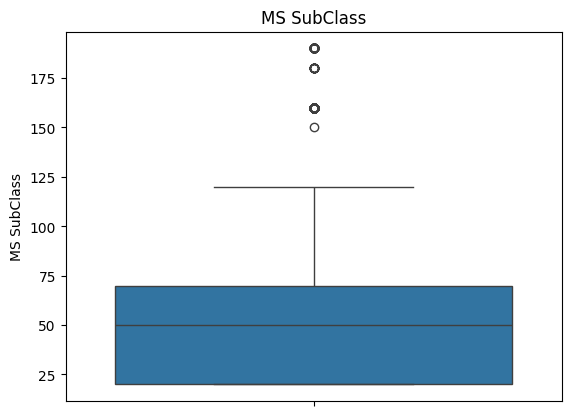

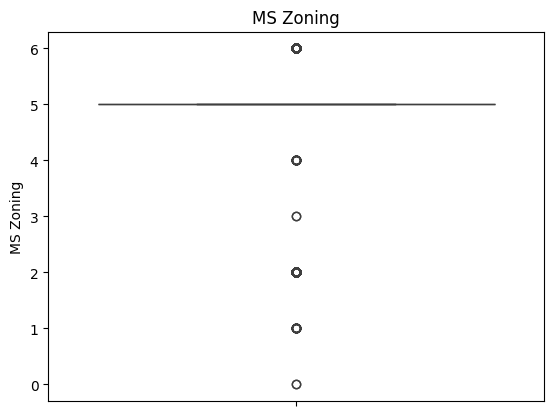

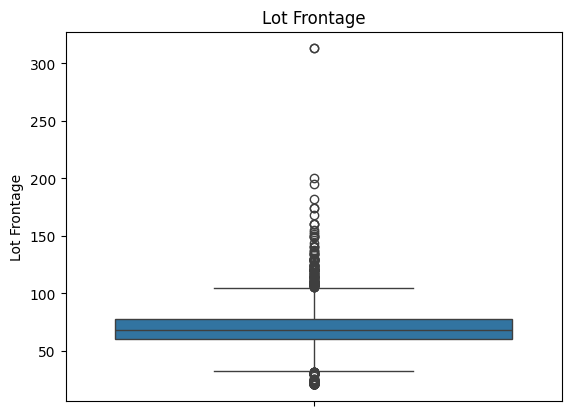

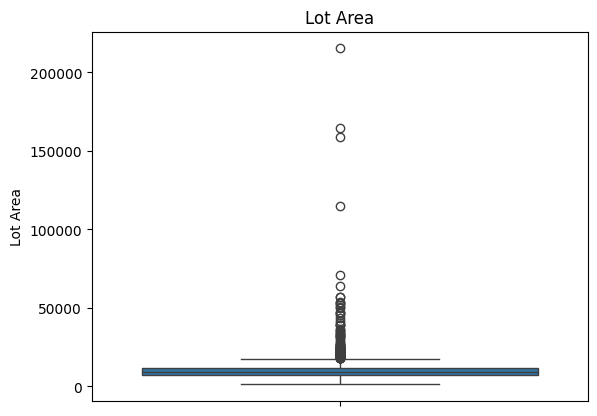

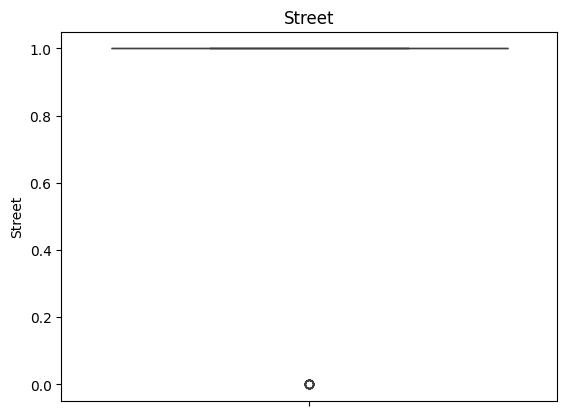

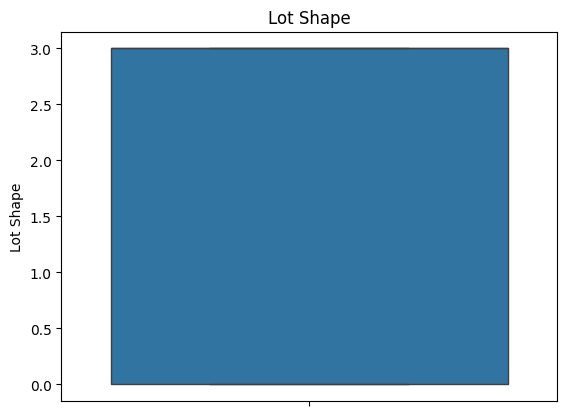

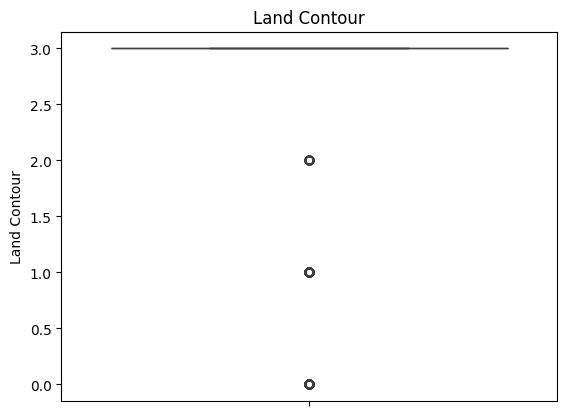

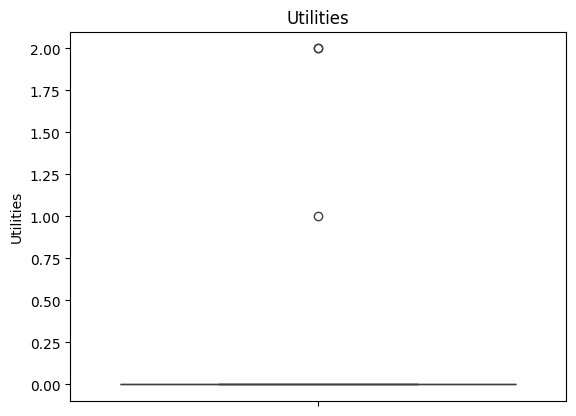

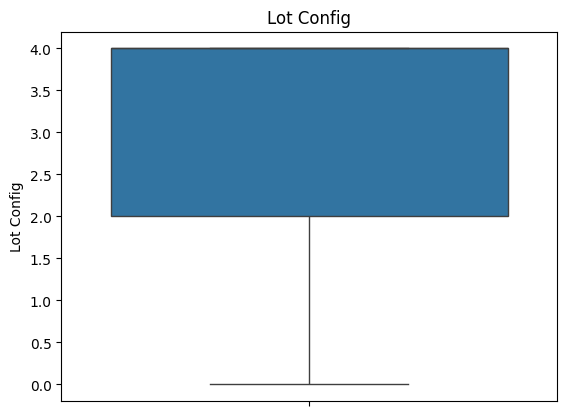

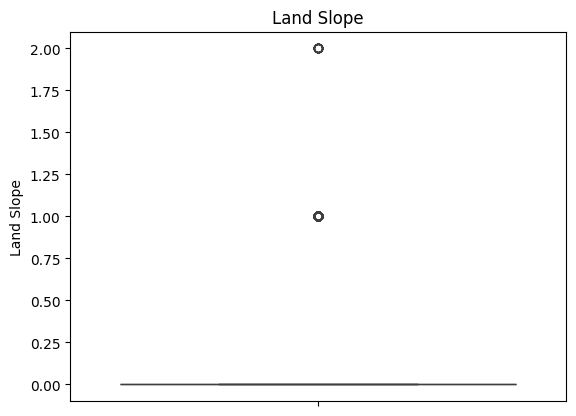

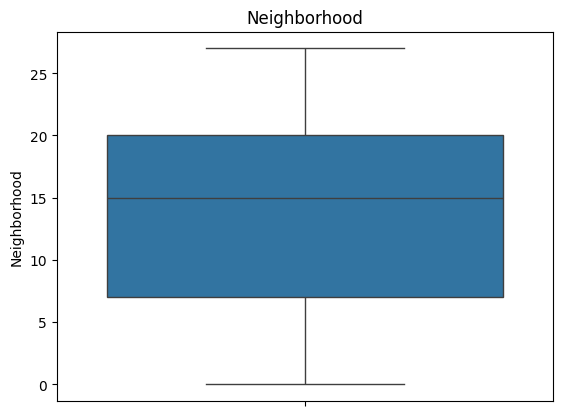

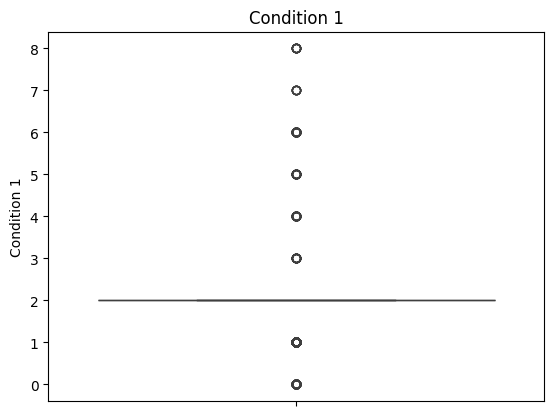

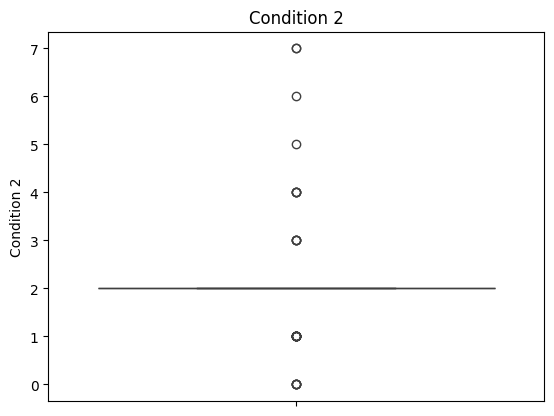

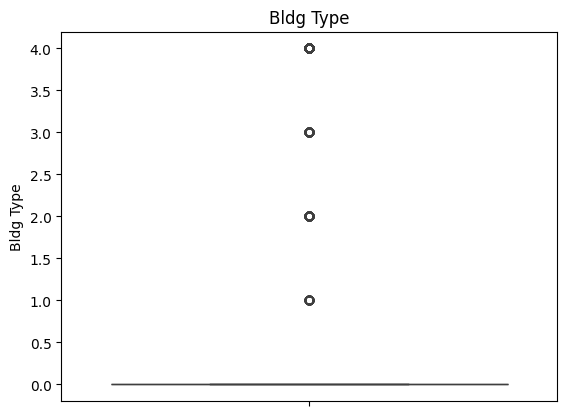

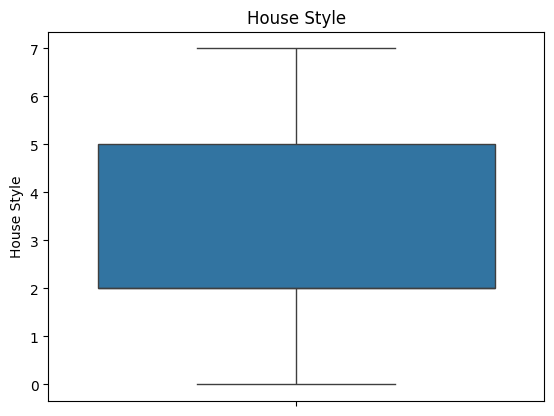

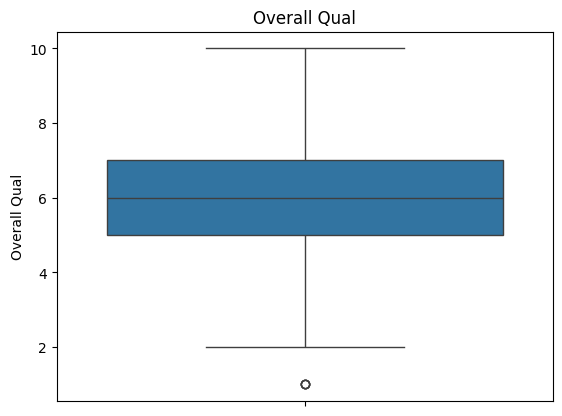

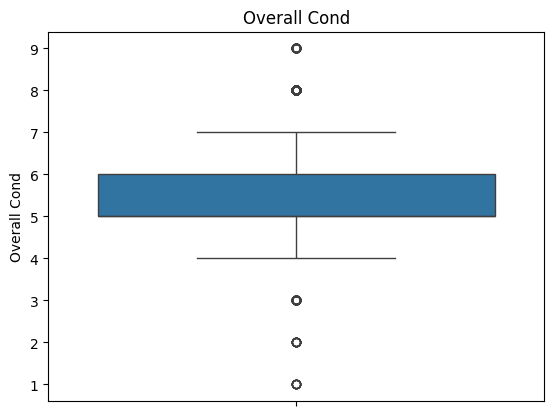

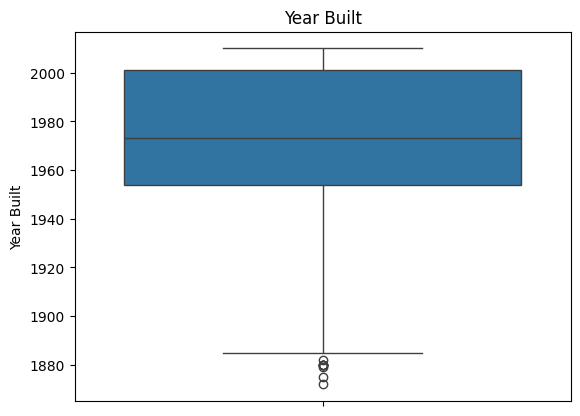

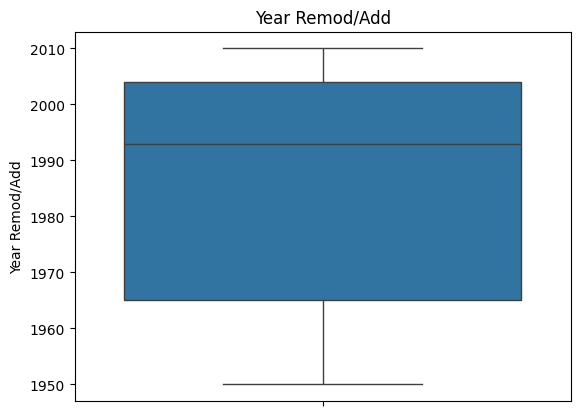

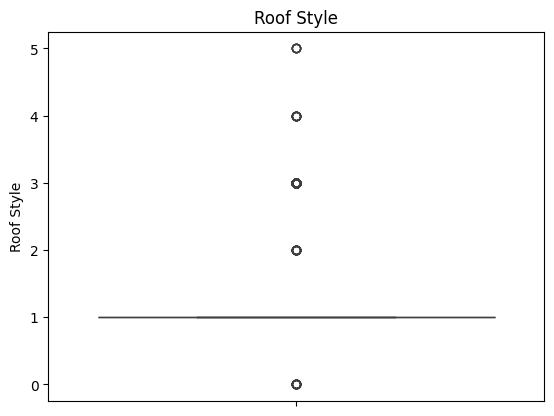

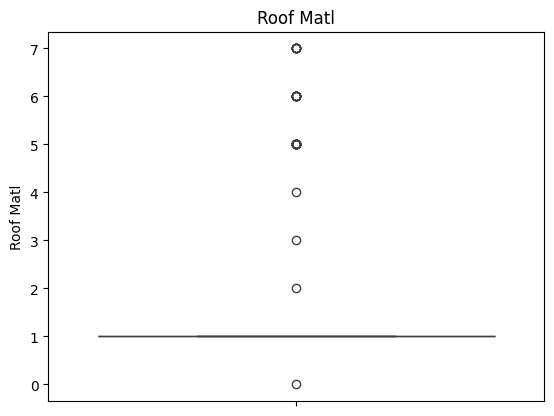

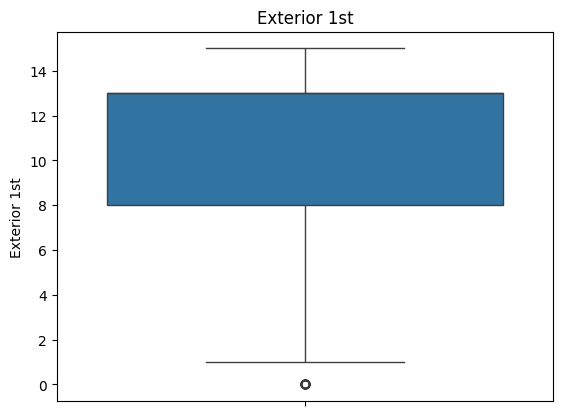

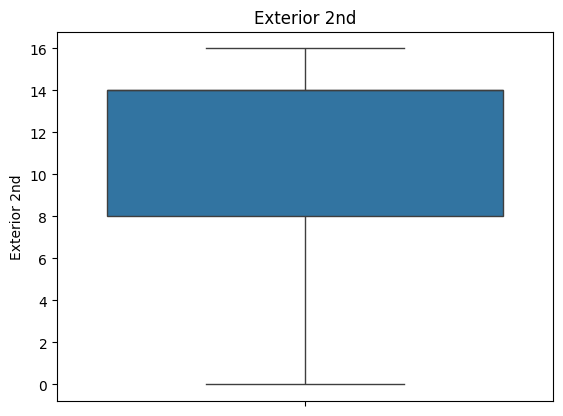

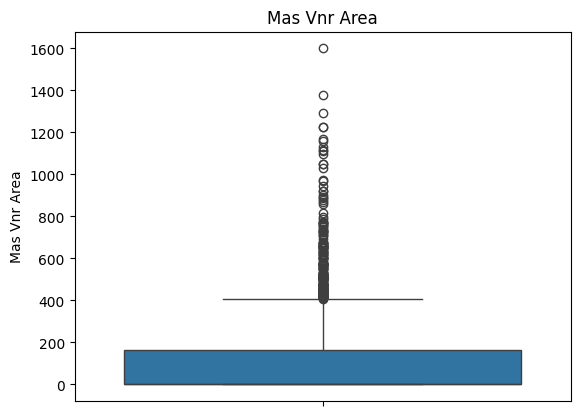

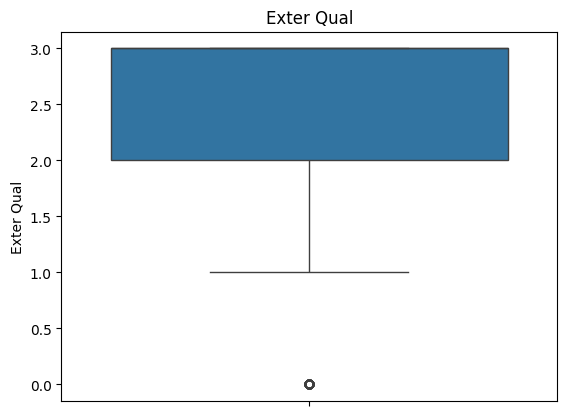

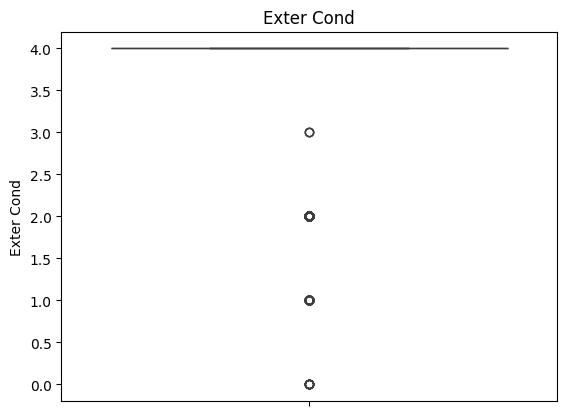

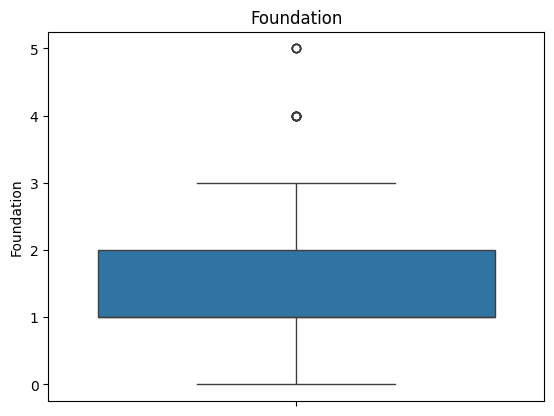

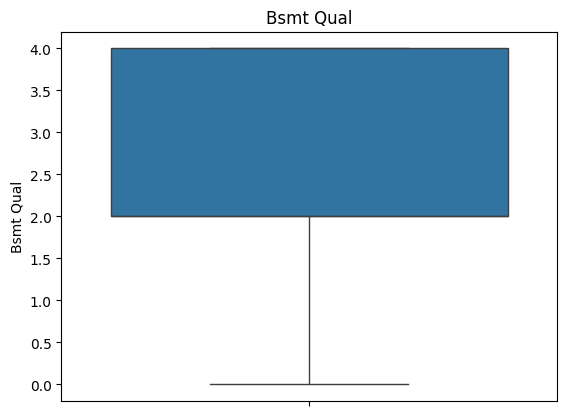

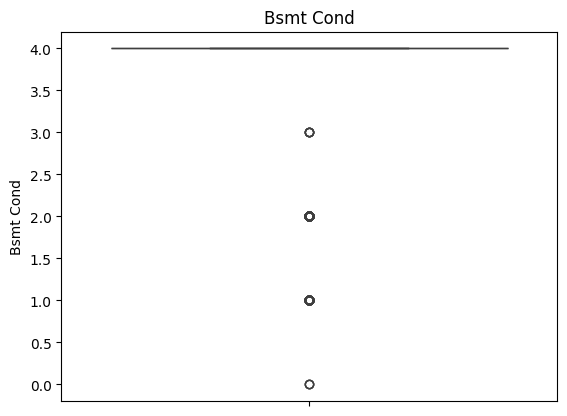

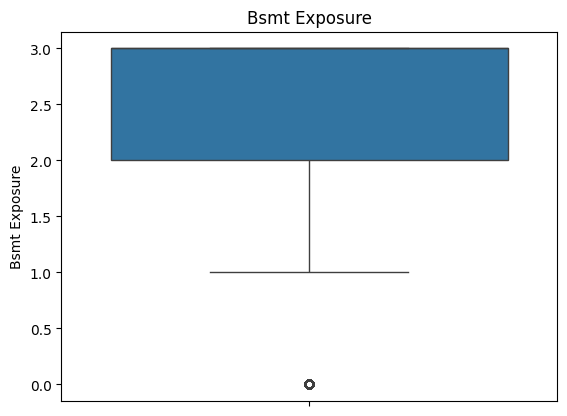

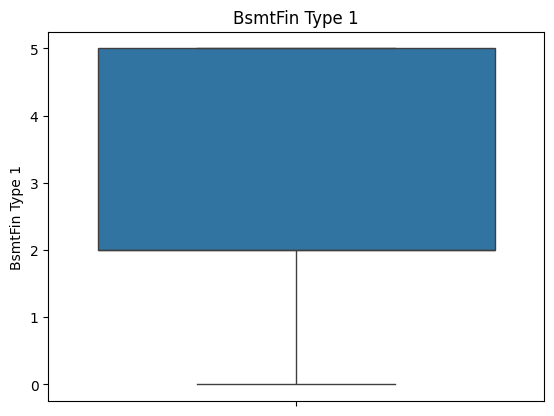

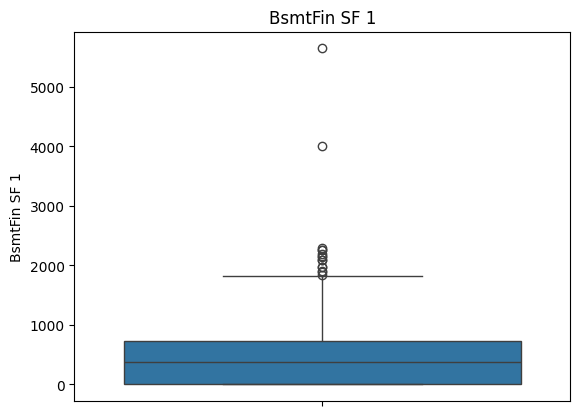

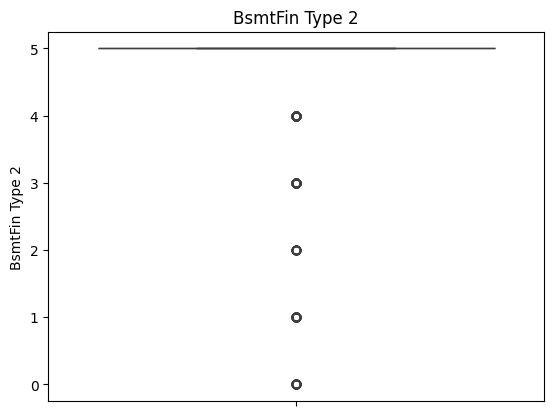

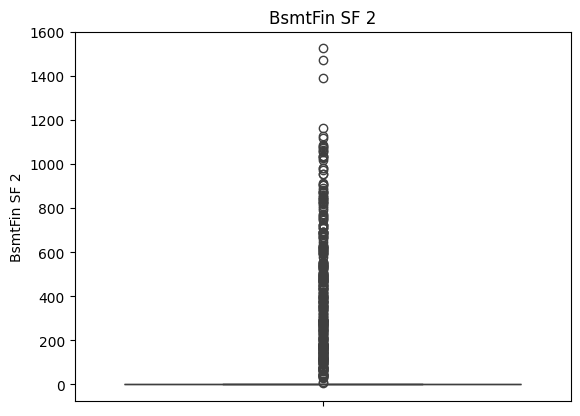

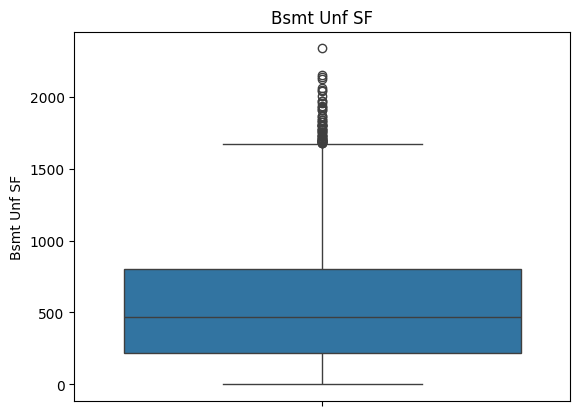

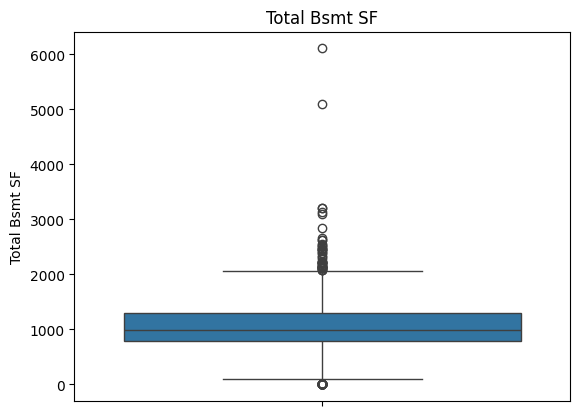

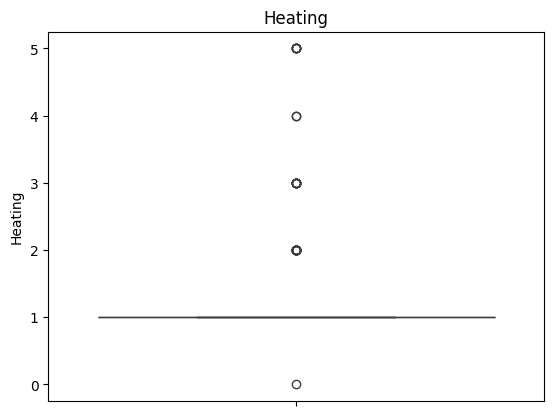

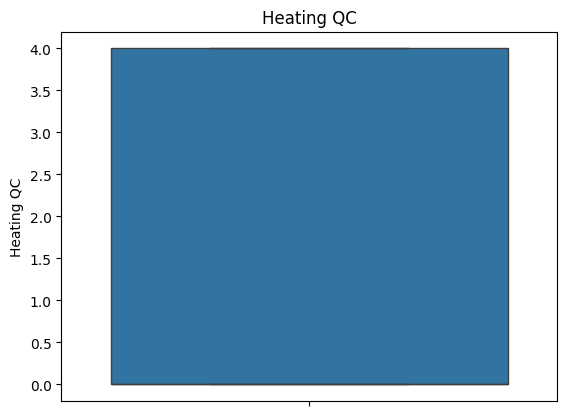

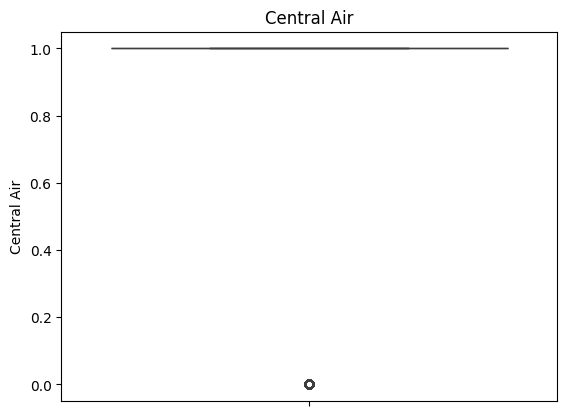

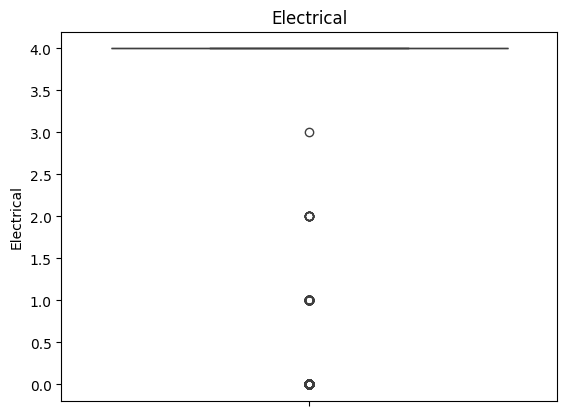

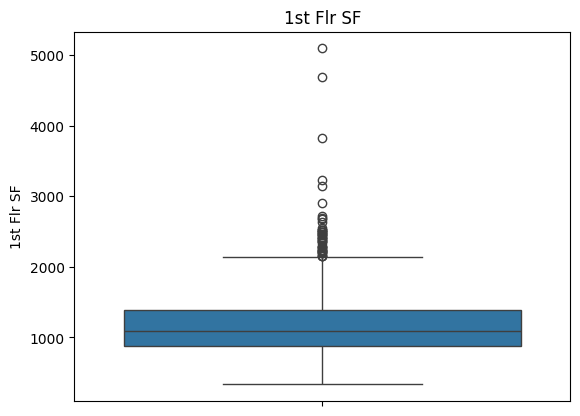

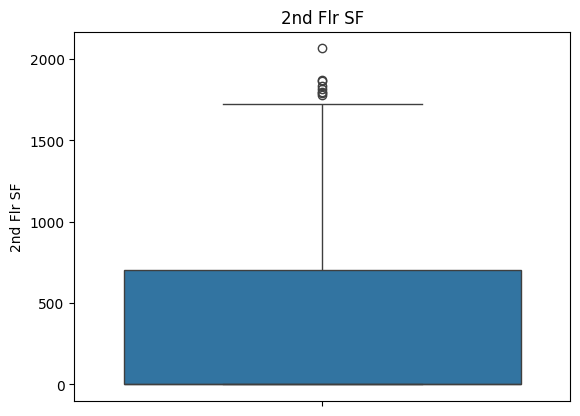

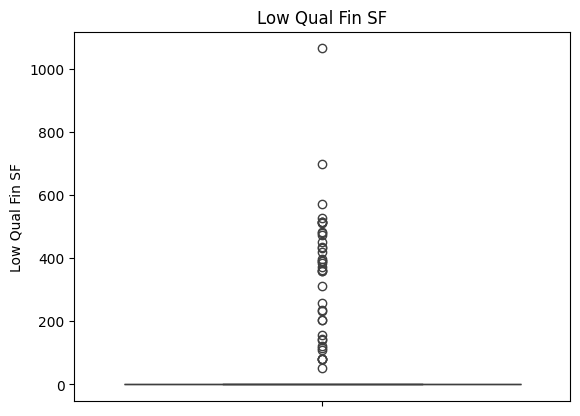

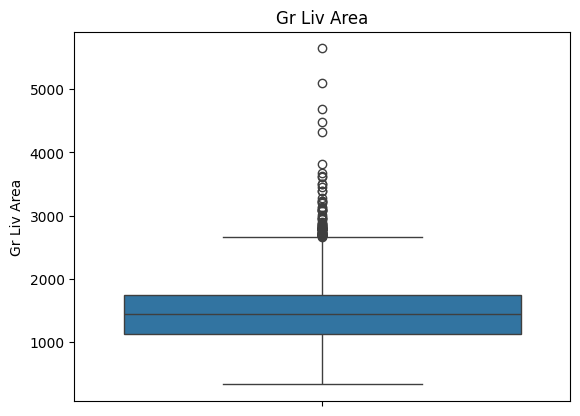

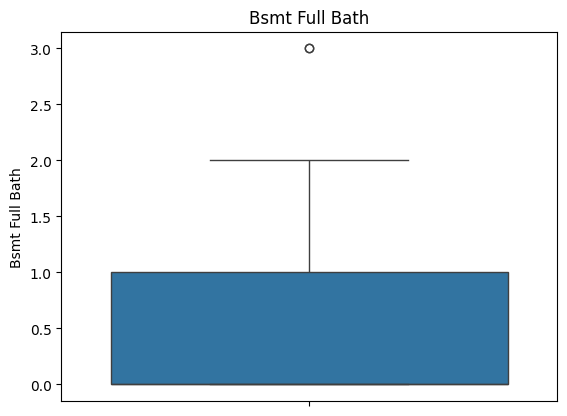

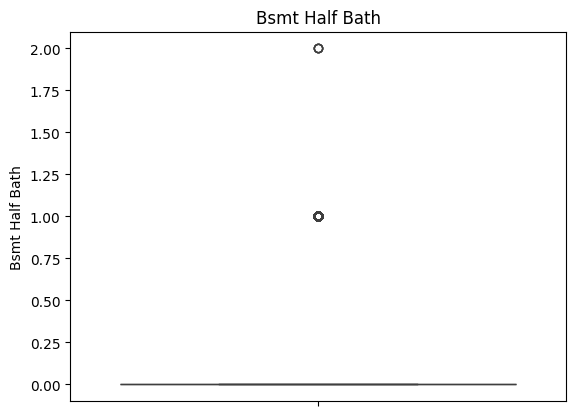

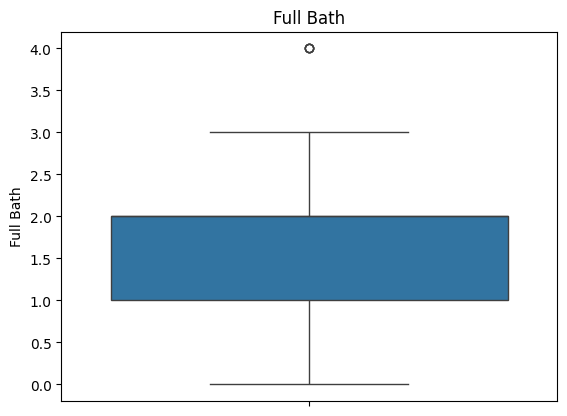

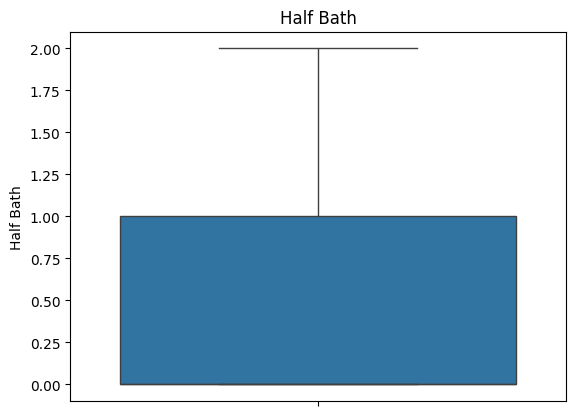

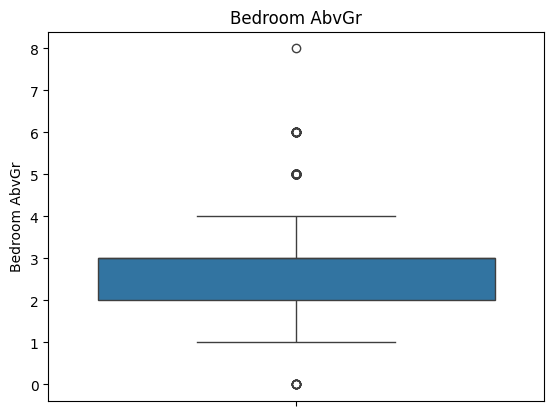

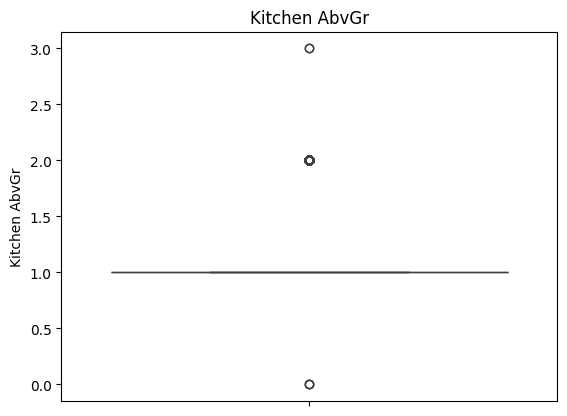

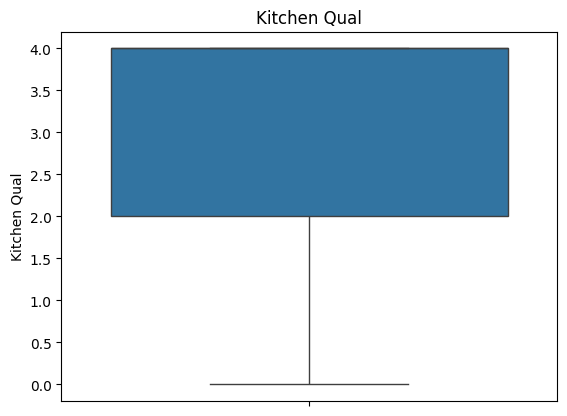

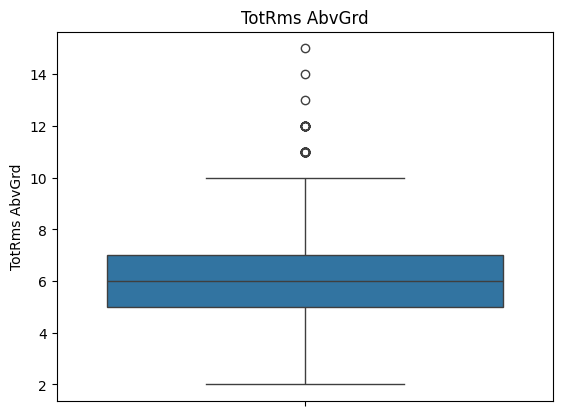

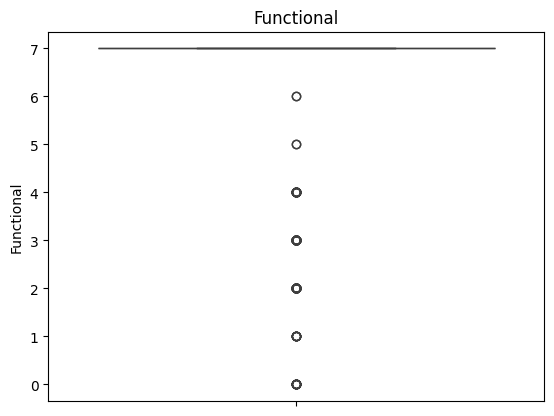

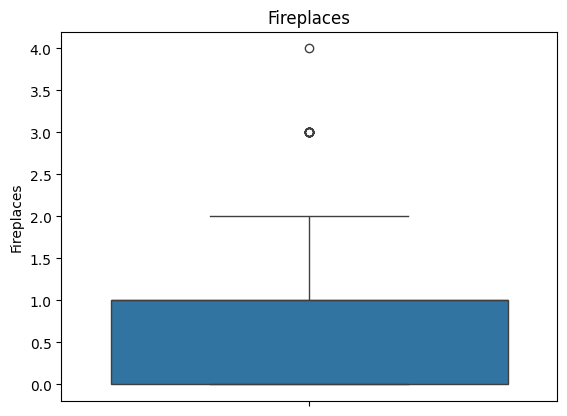

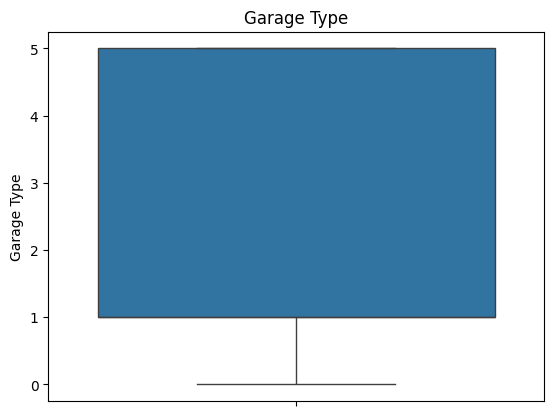

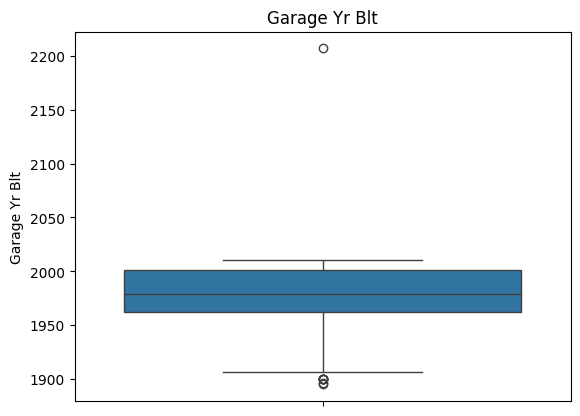

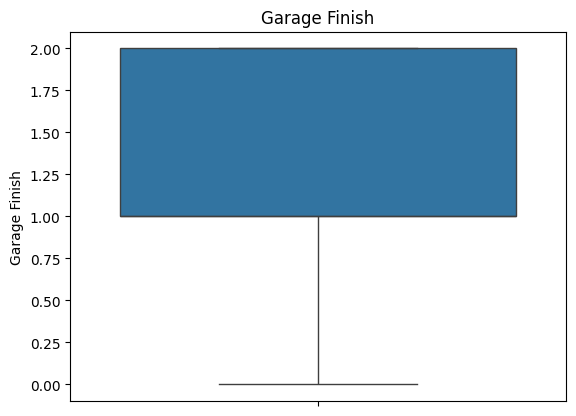

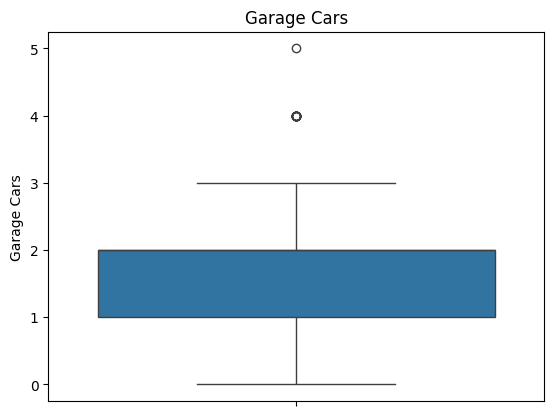

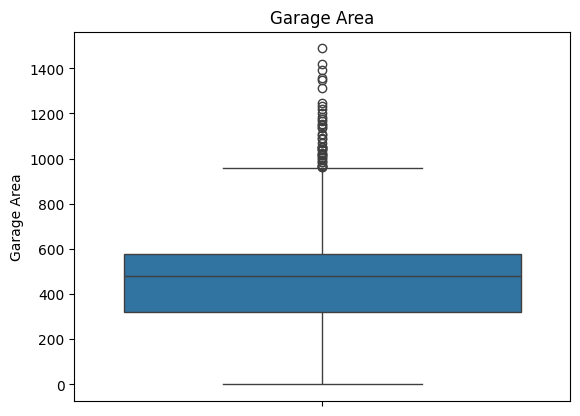

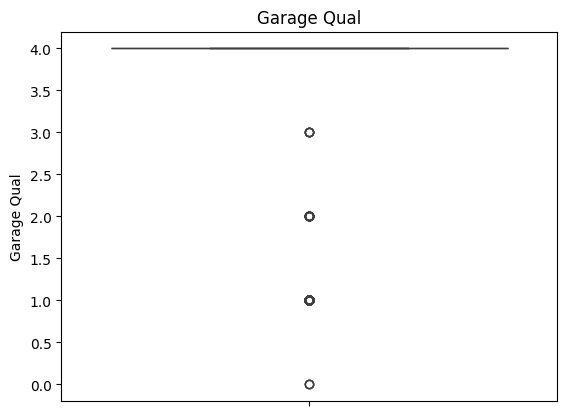

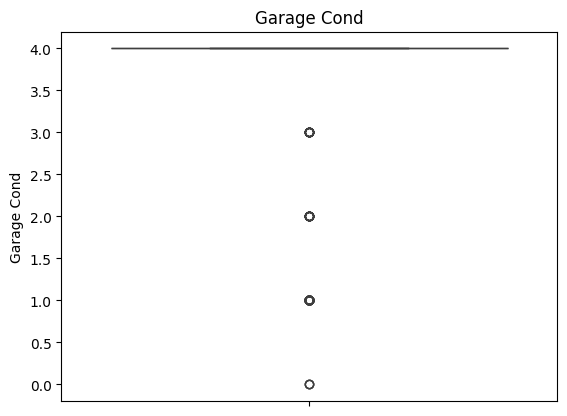

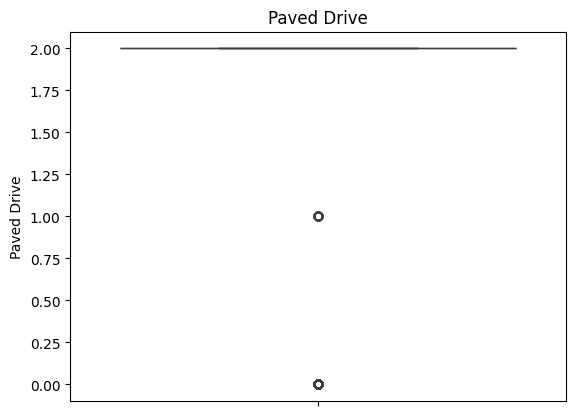

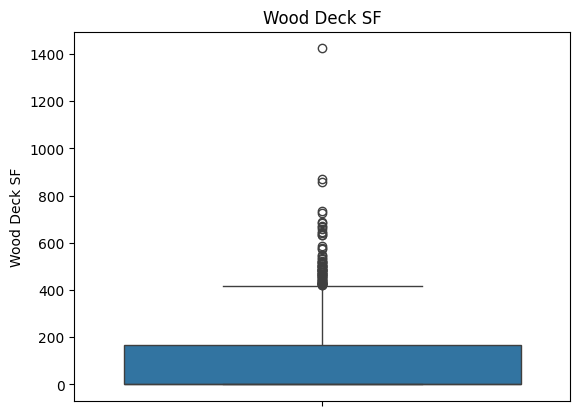

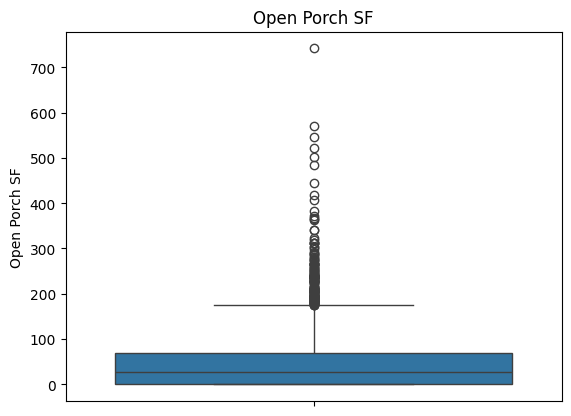

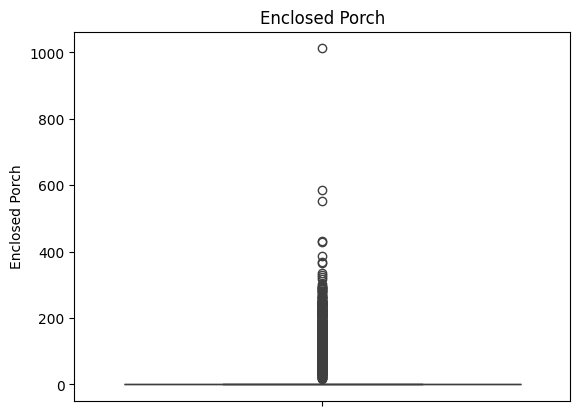

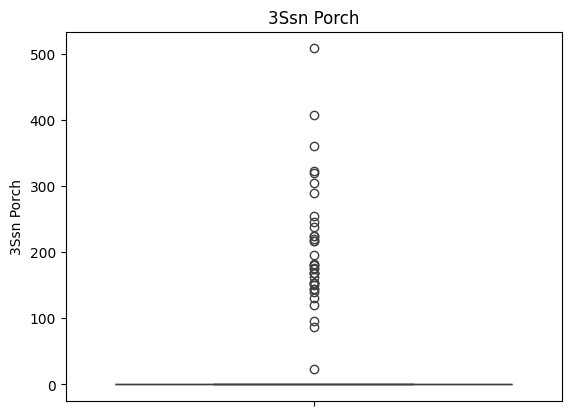

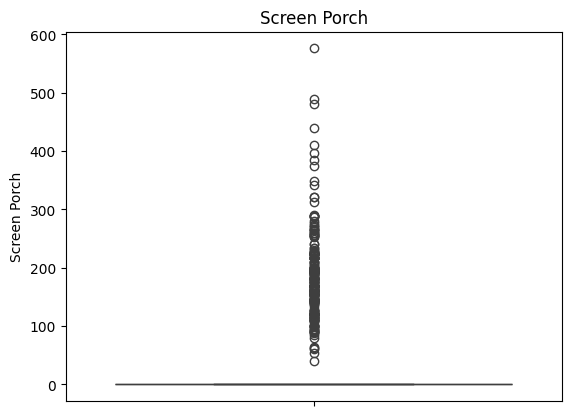

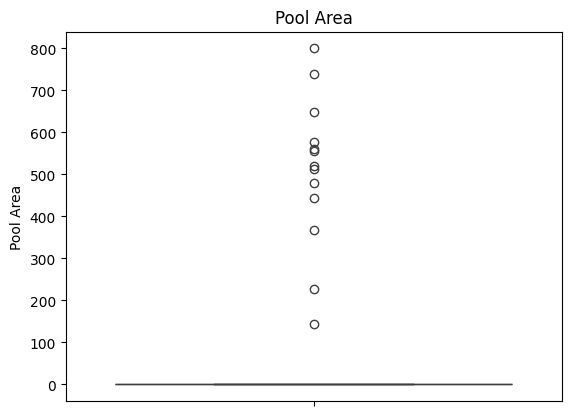

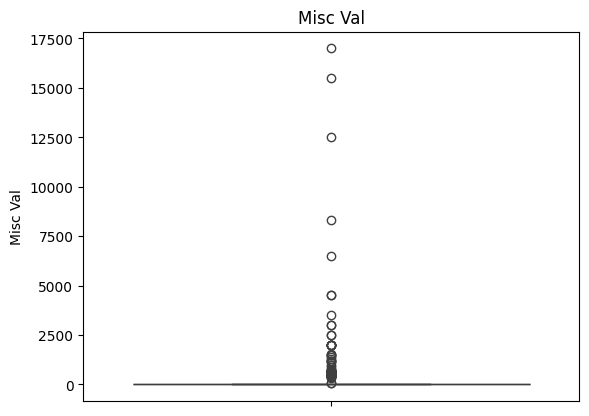

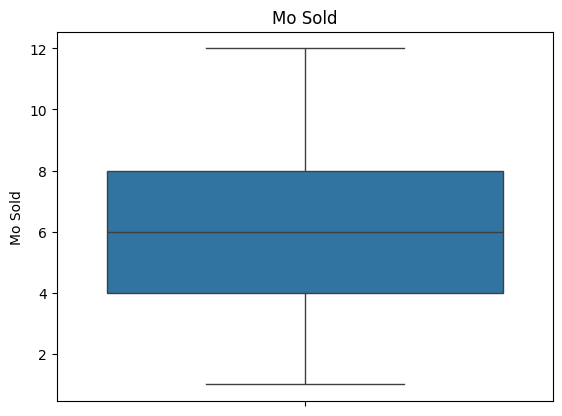

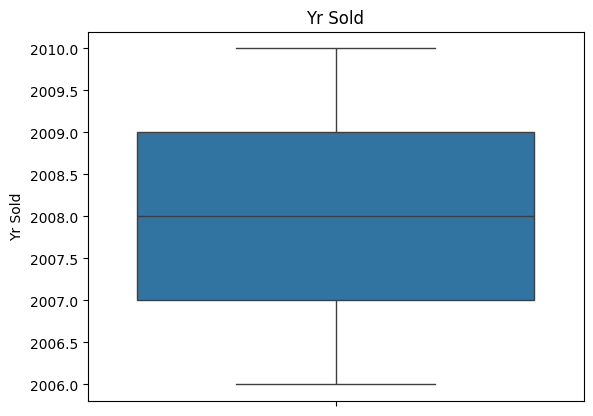

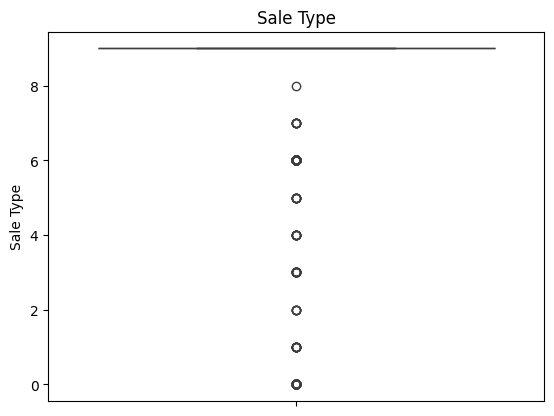

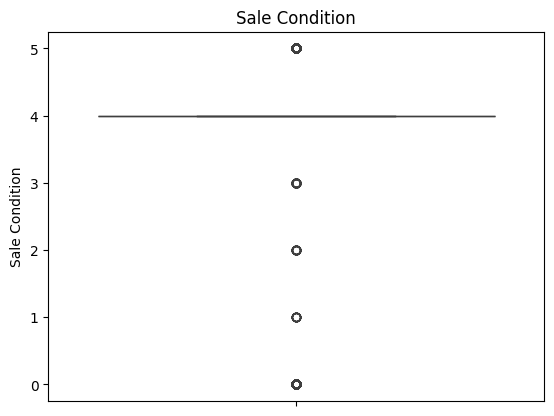

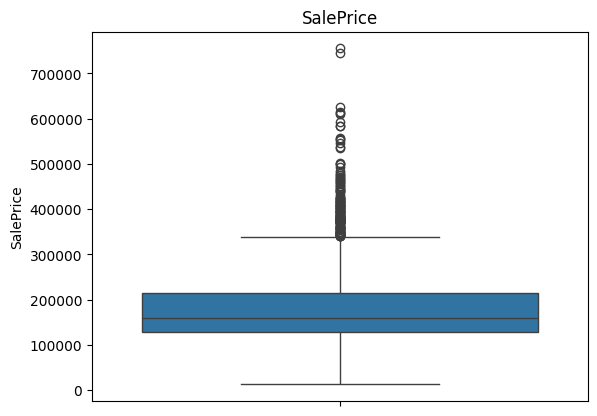

In [17]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [18]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                    np.where(df[col] > upper, upper, df[col]))

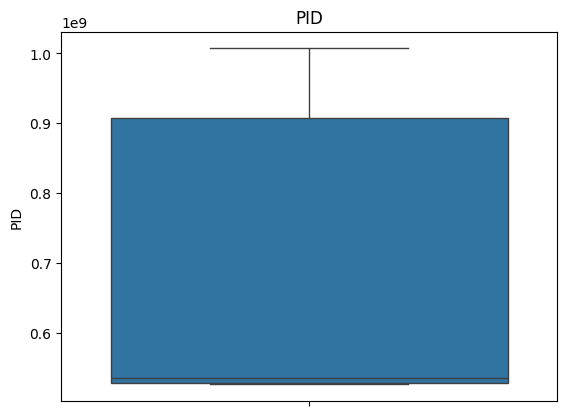

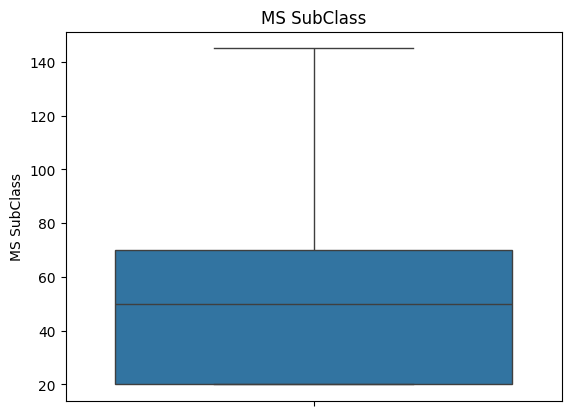

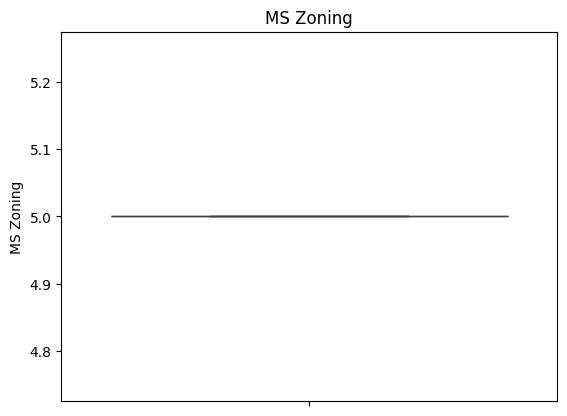

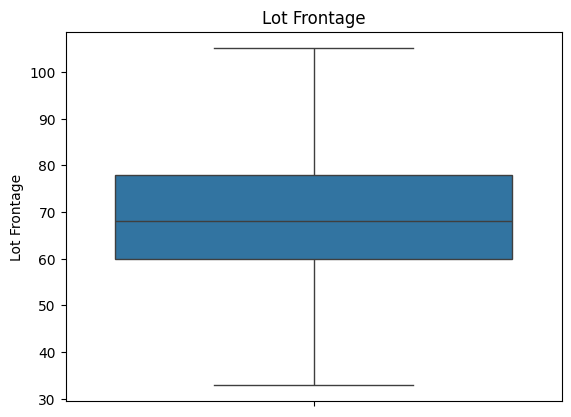

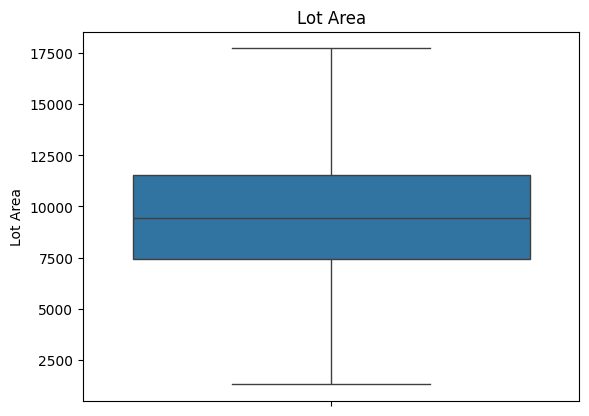

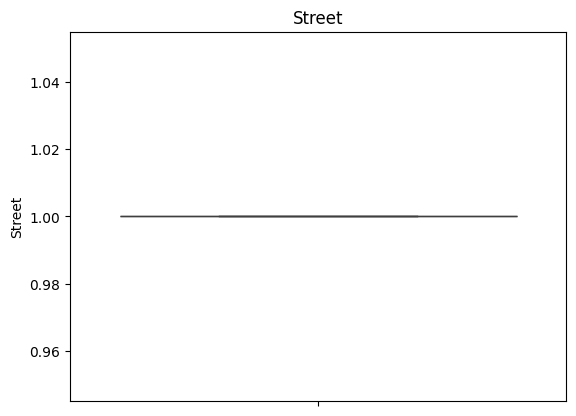

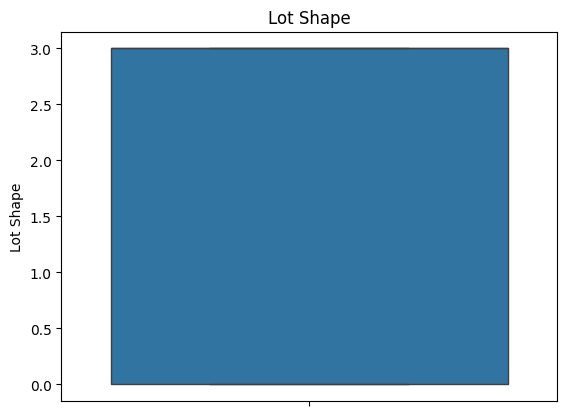

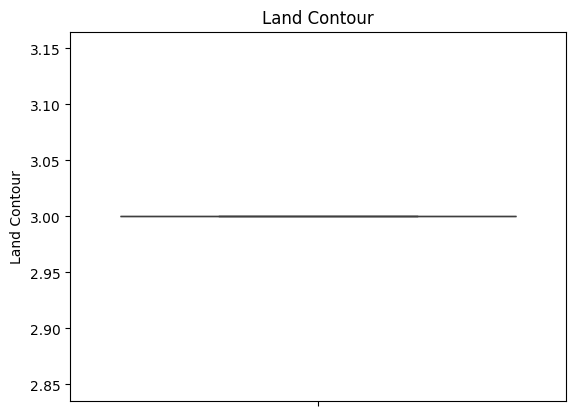

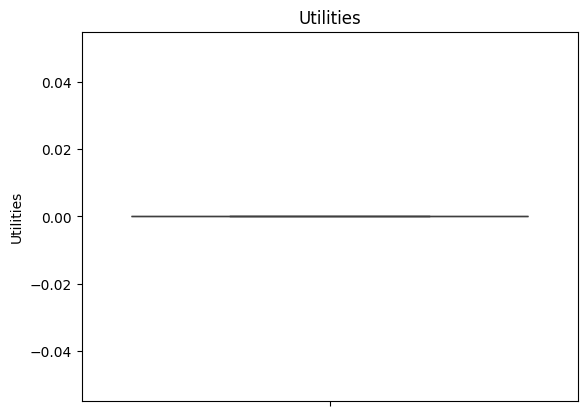

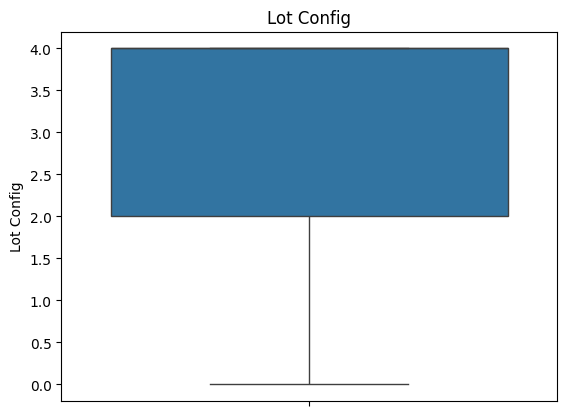

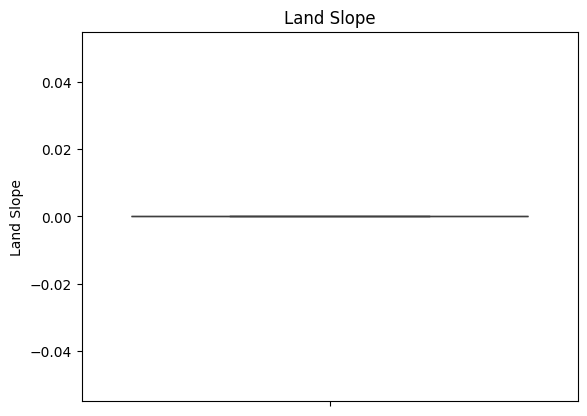

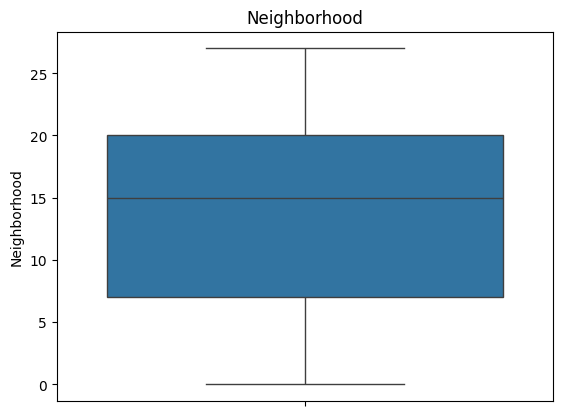

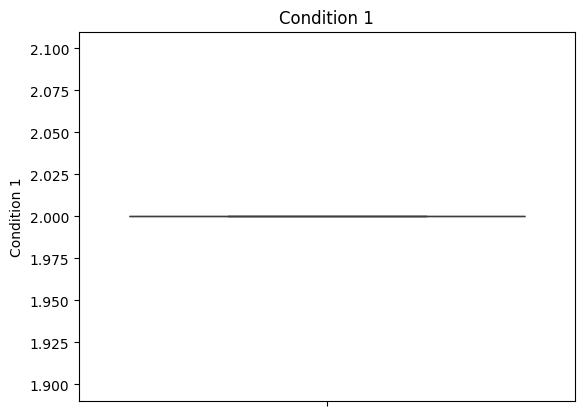

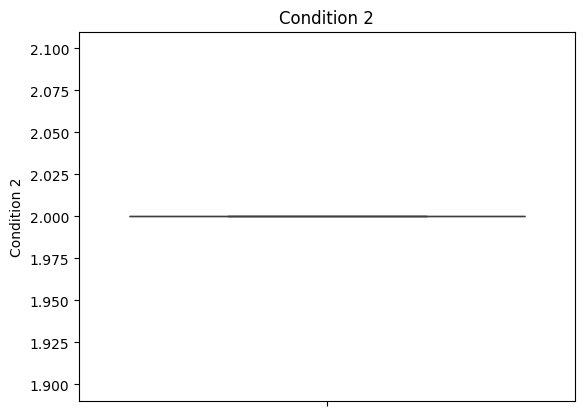

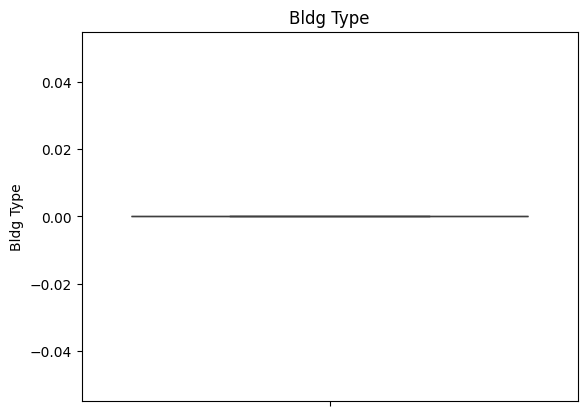

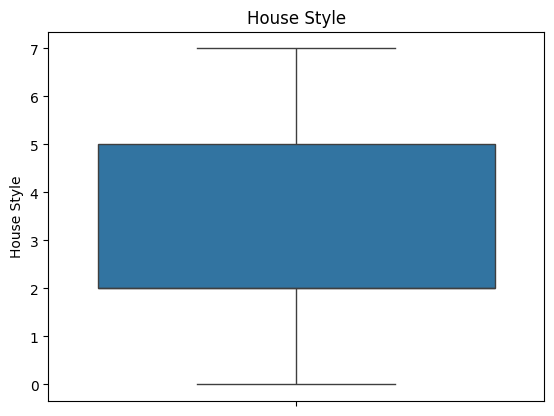

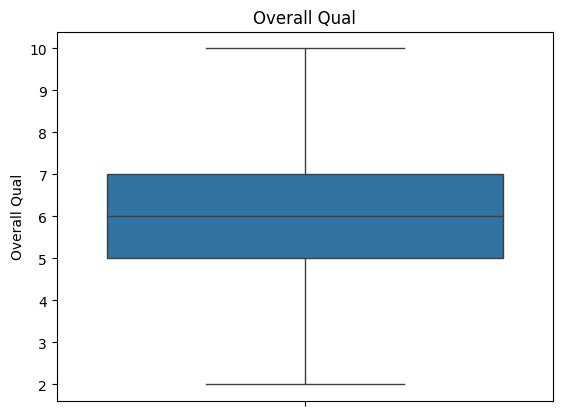

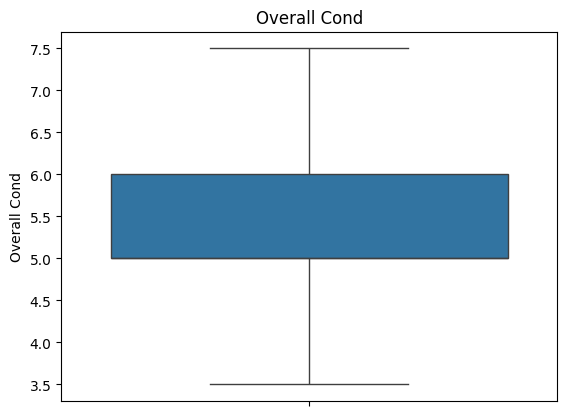

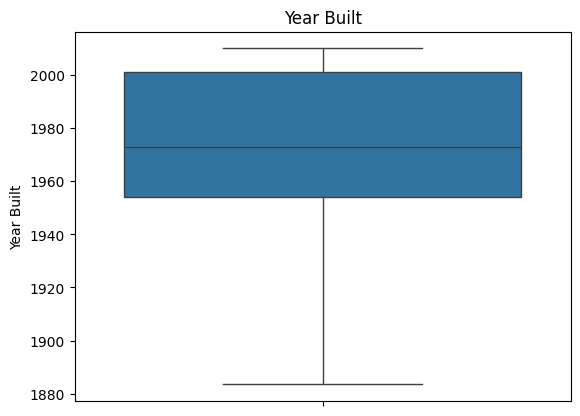

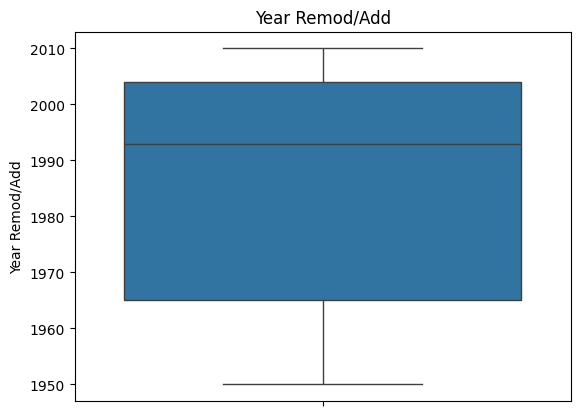

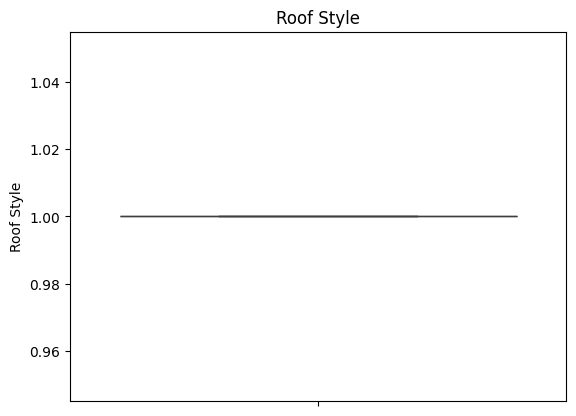

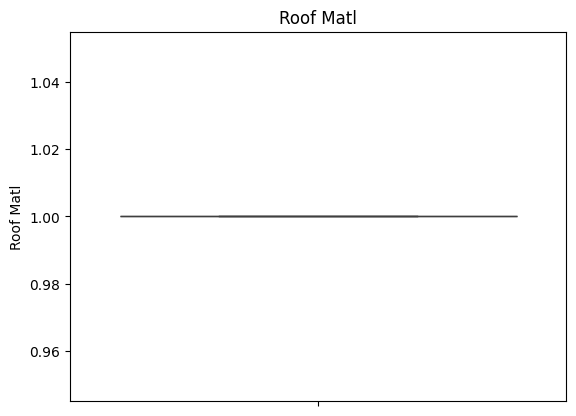

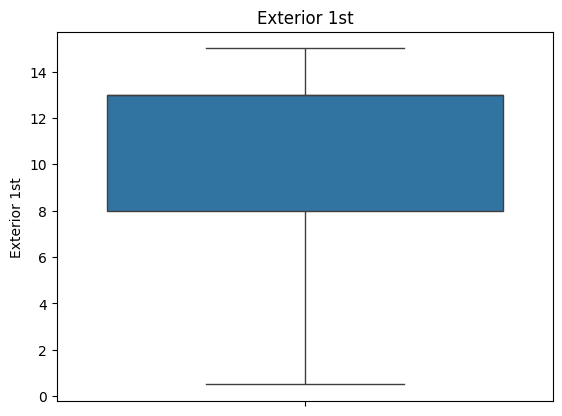

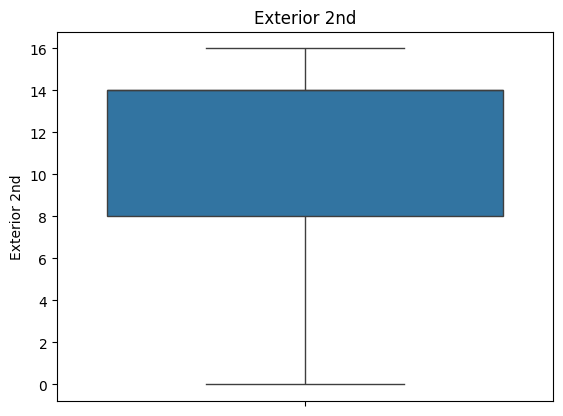

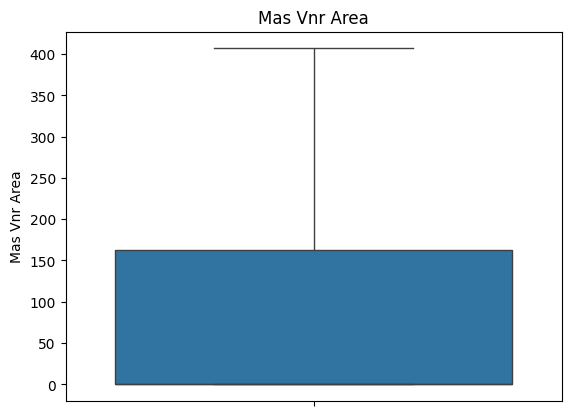

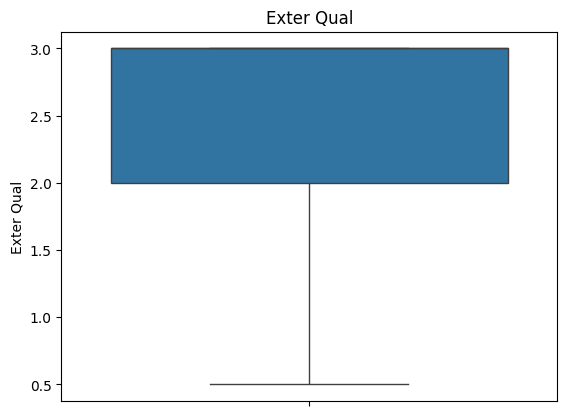

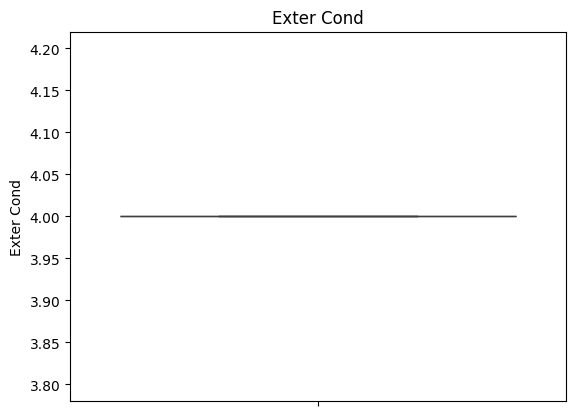

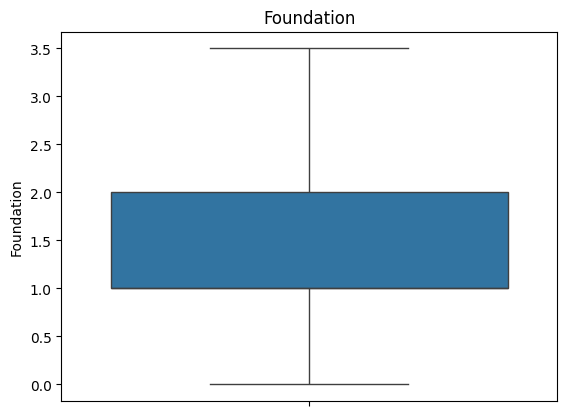

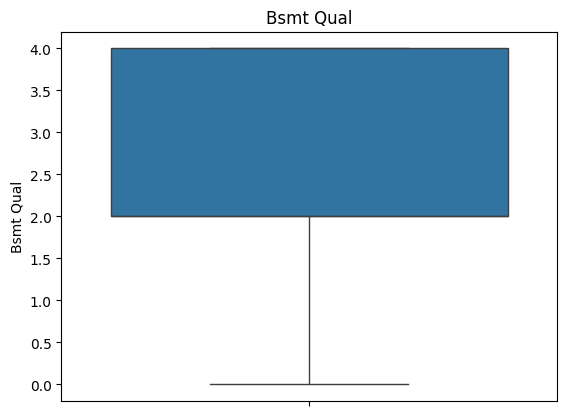

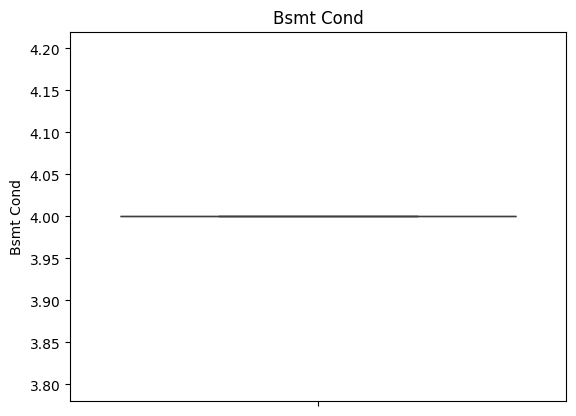

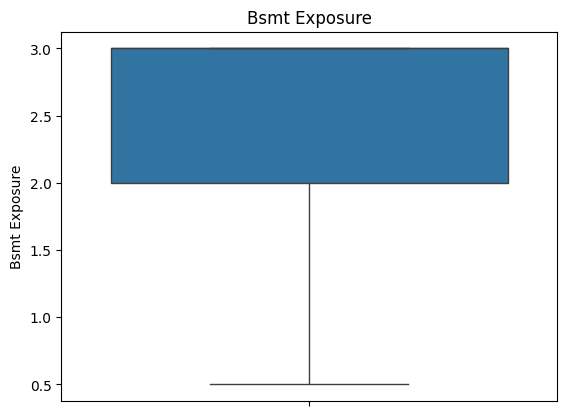

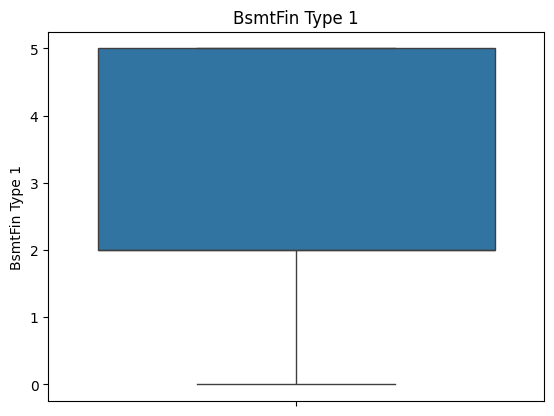

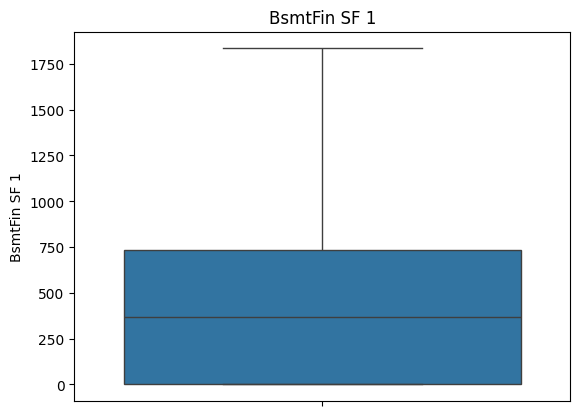

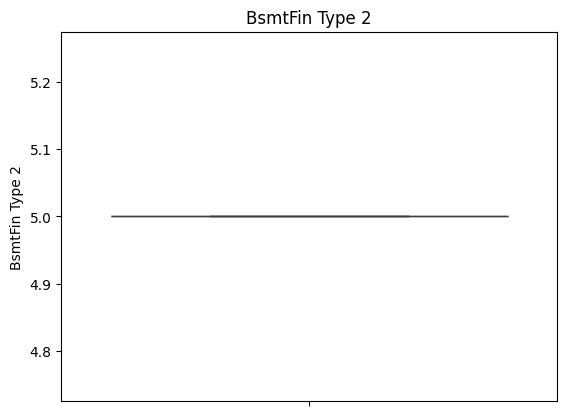

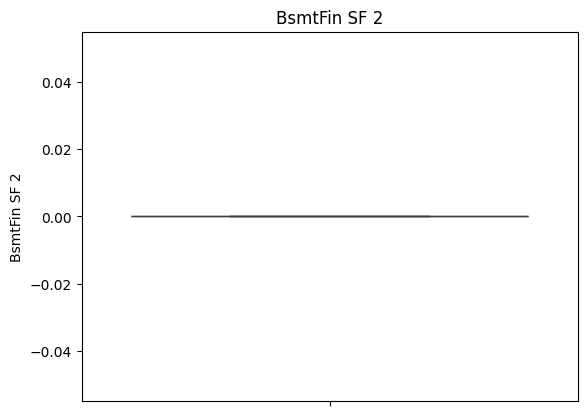

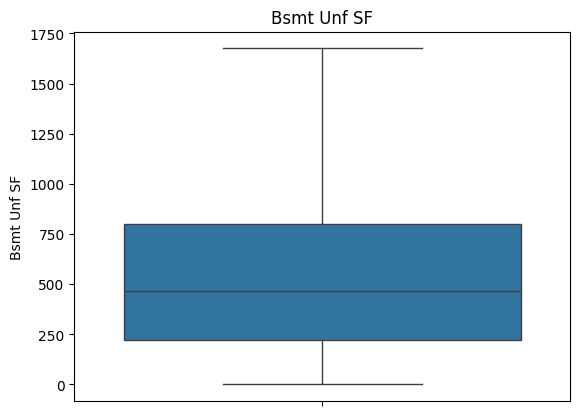

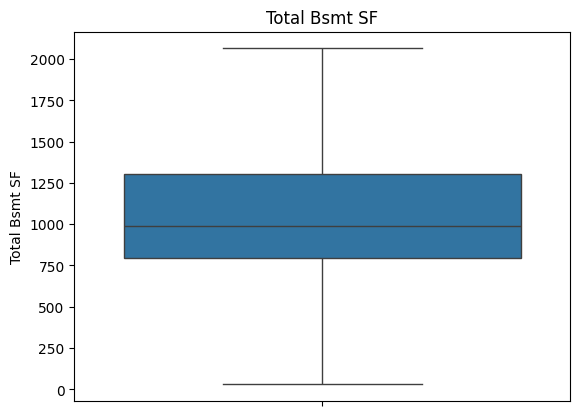

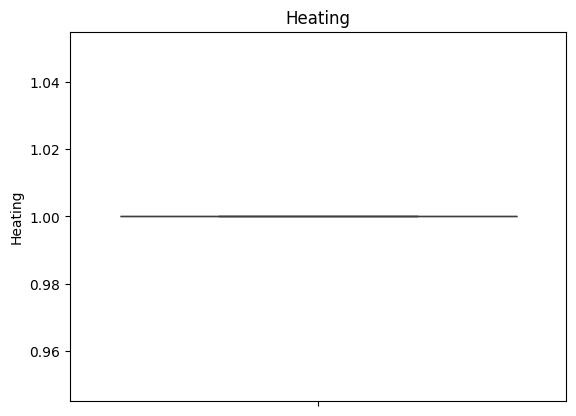

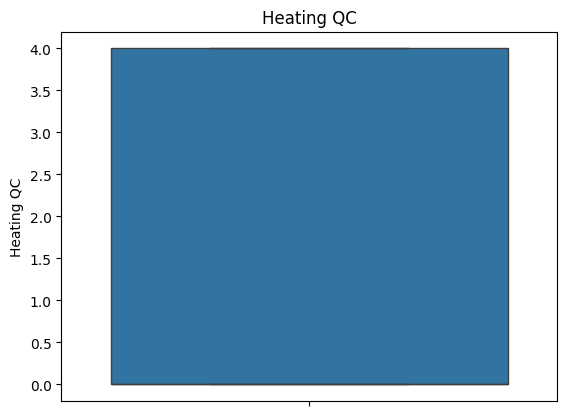

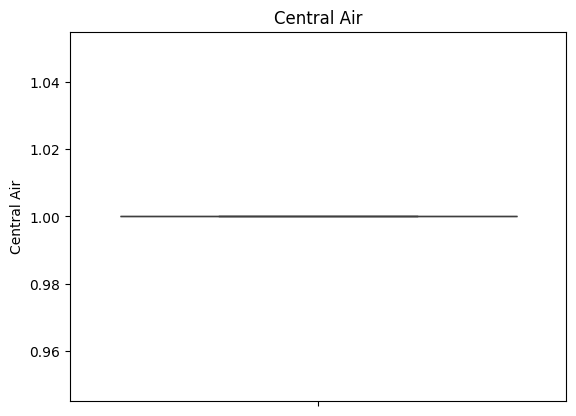

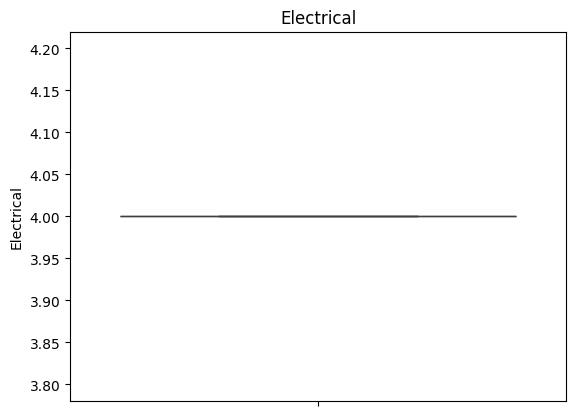

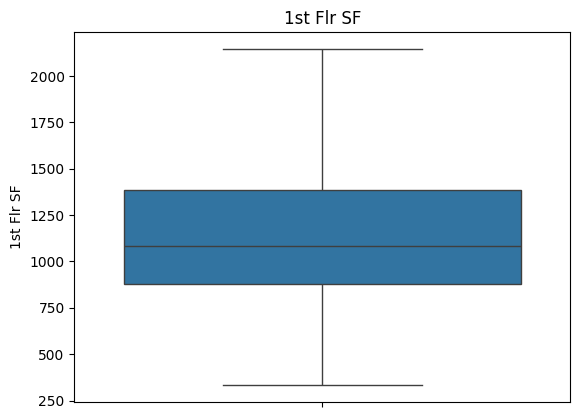

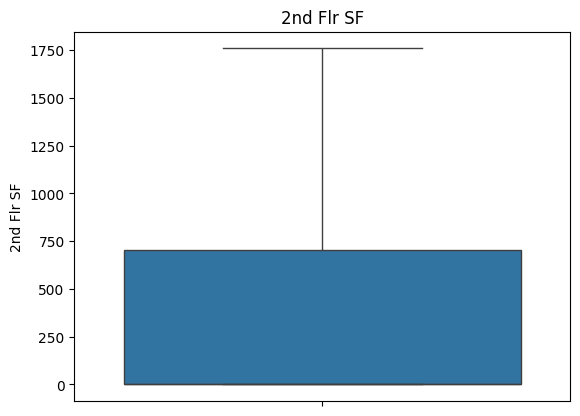

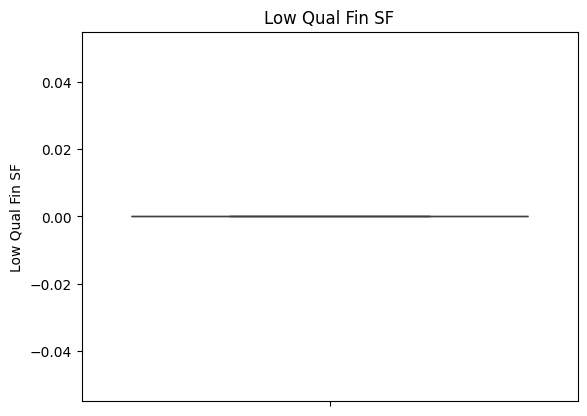

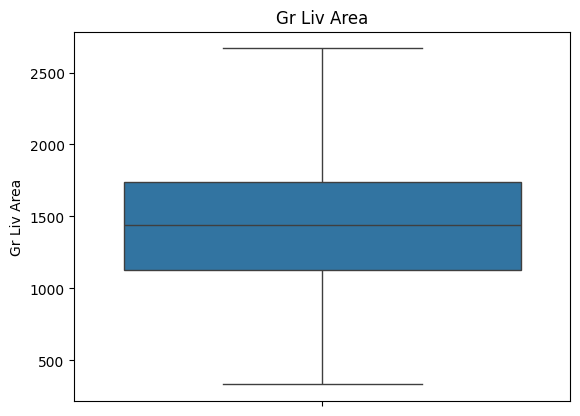

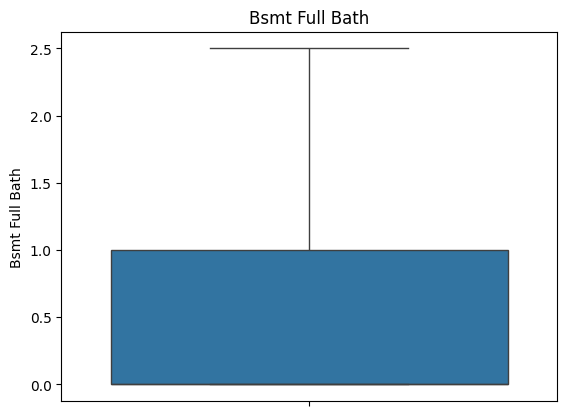

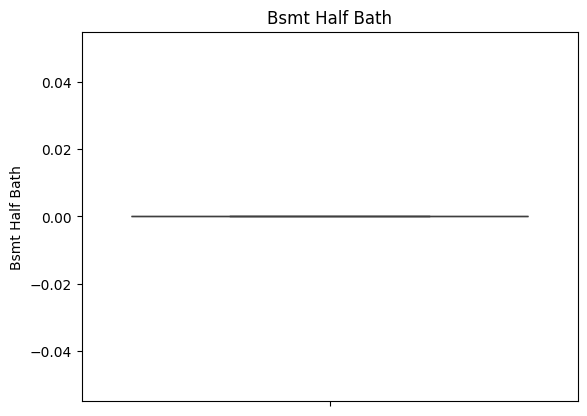

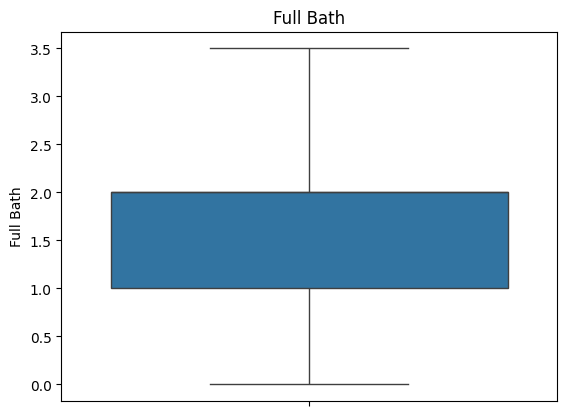

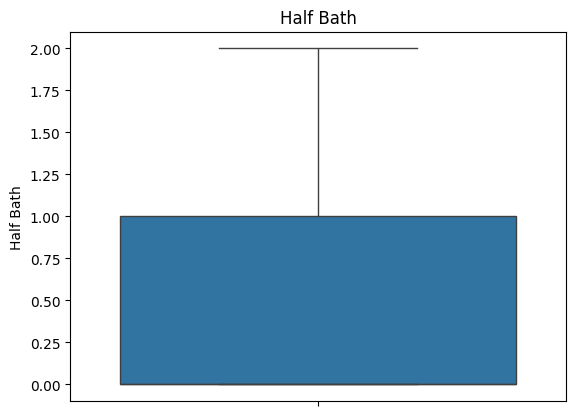

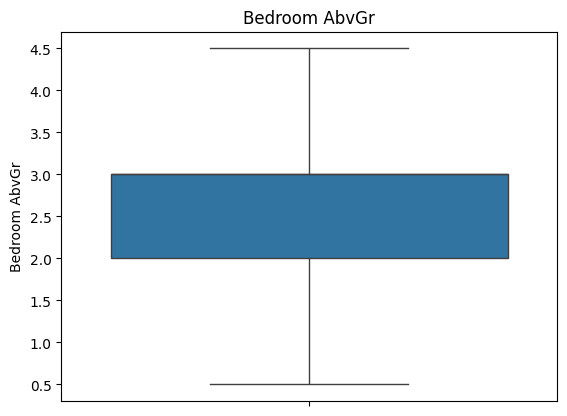

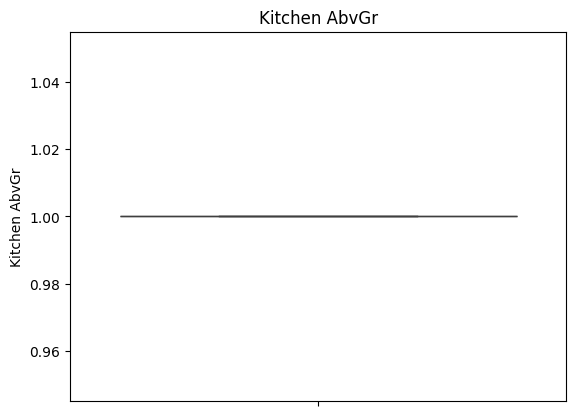

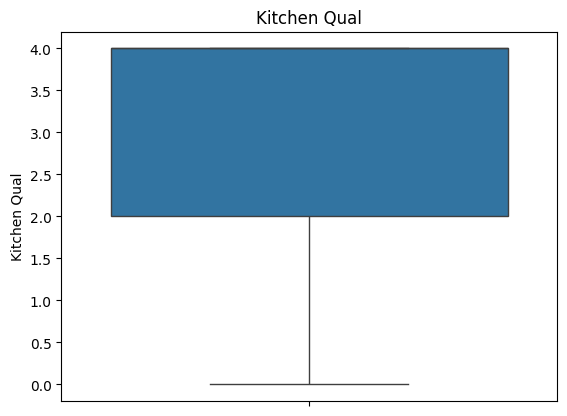

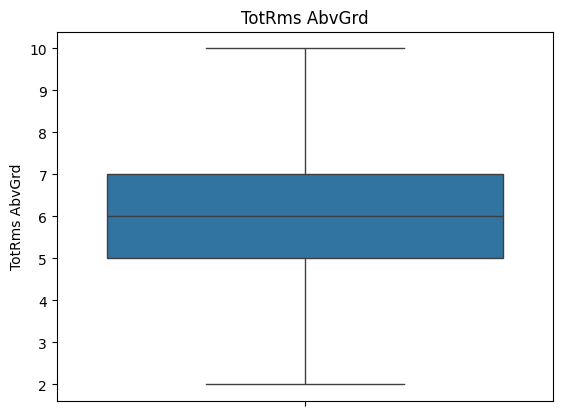

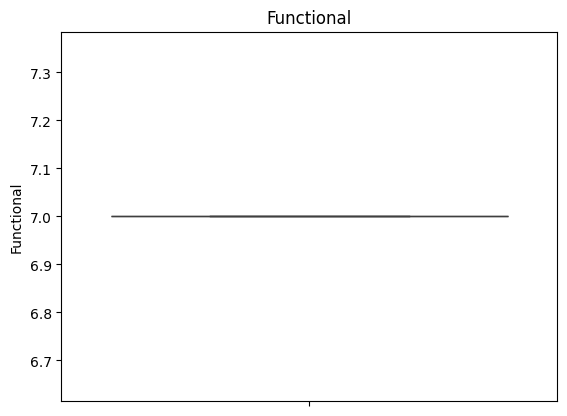

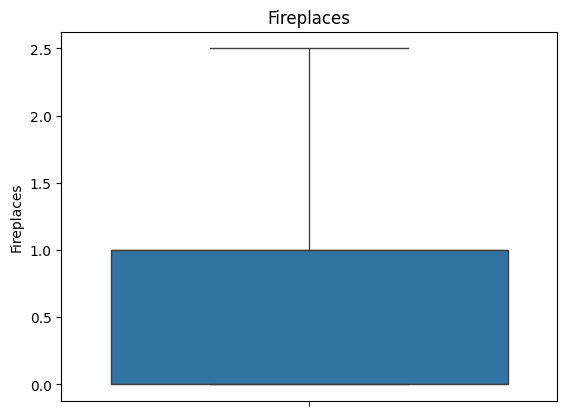

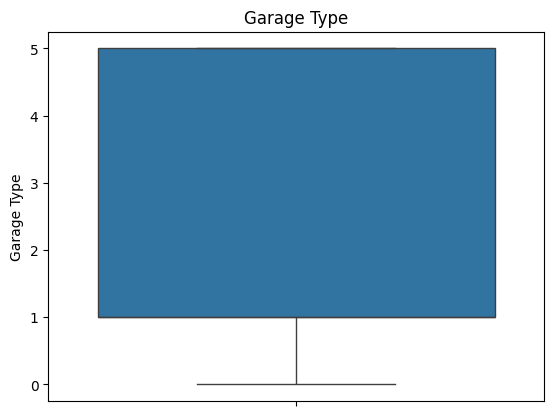

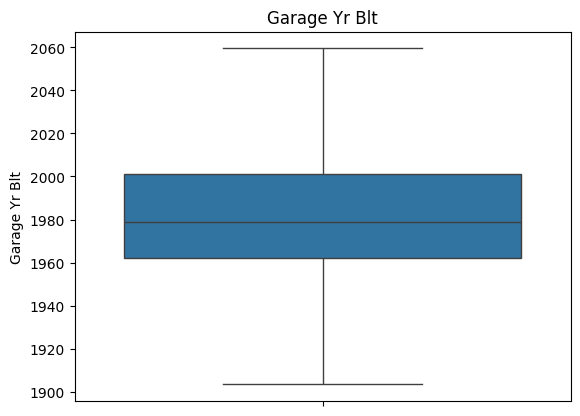

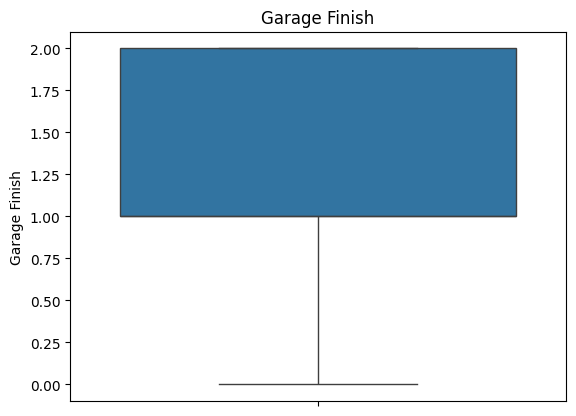

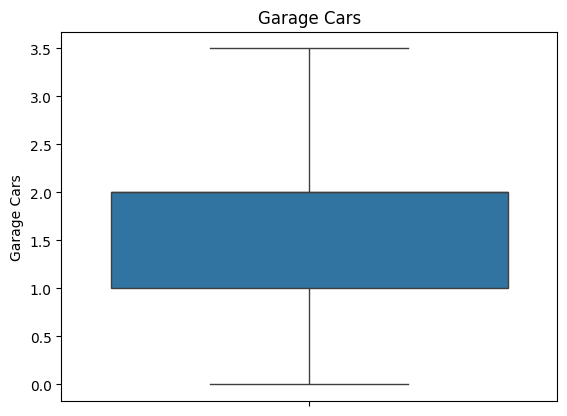

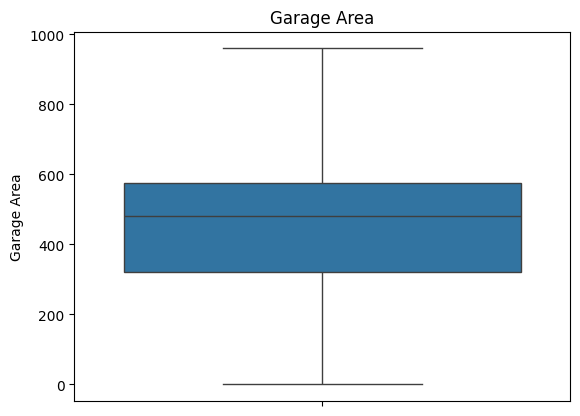

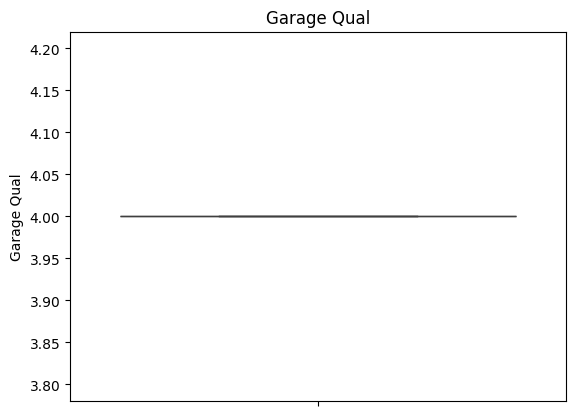

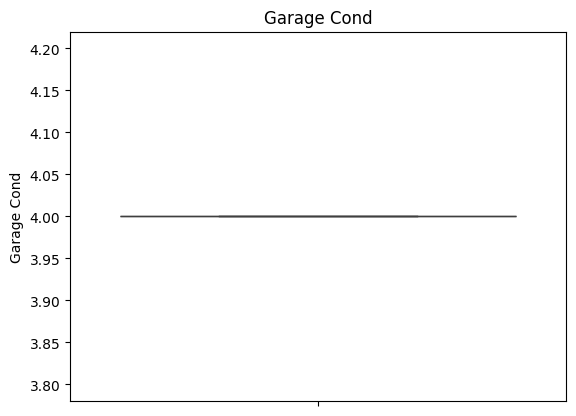

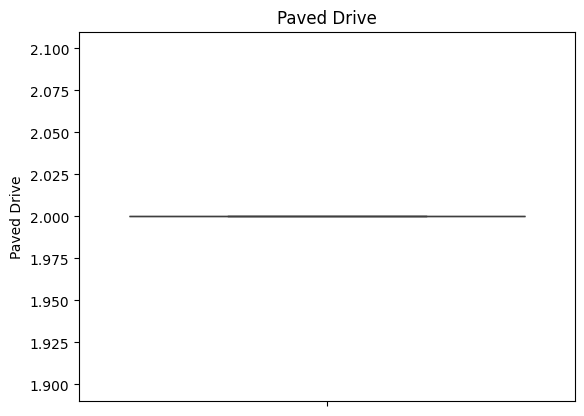

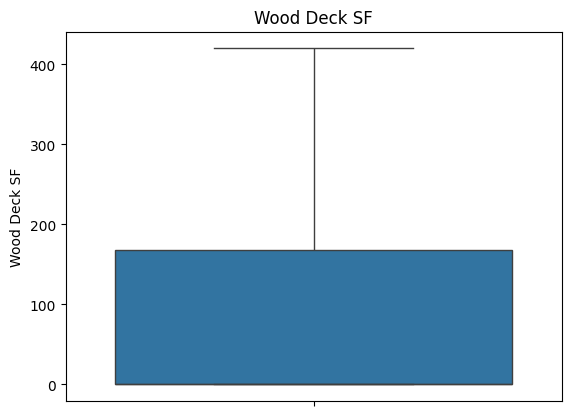

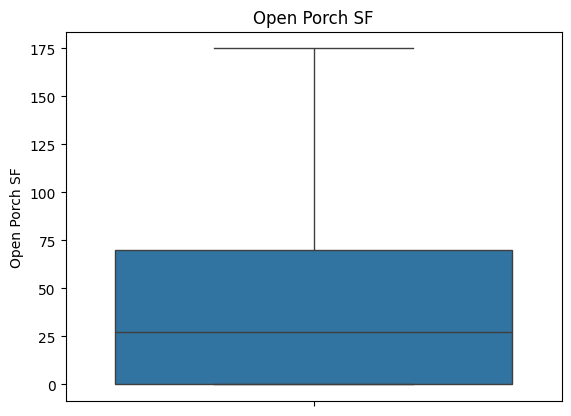

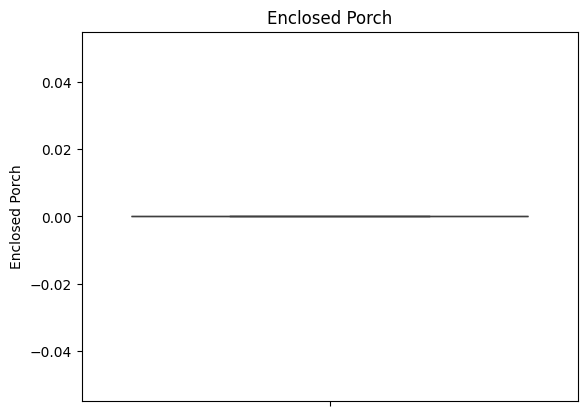

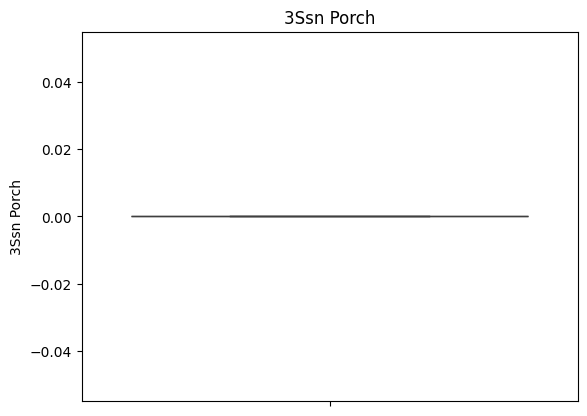

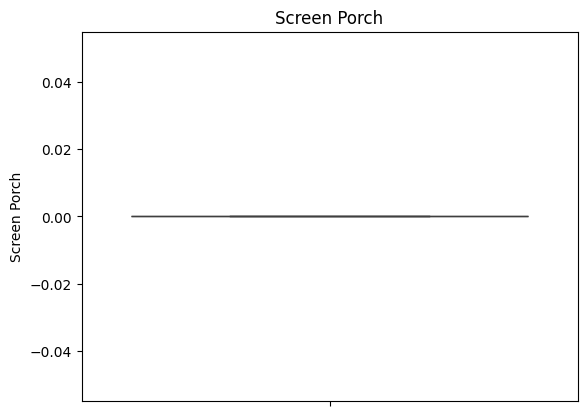

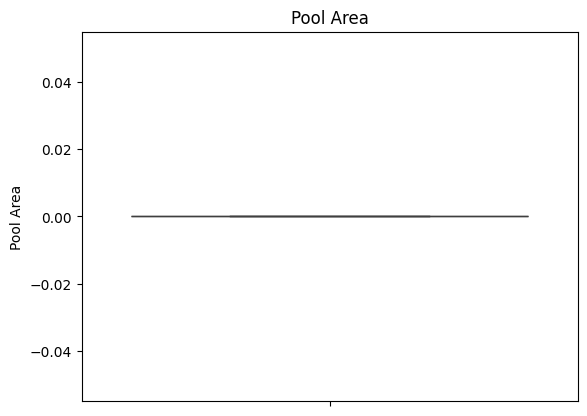

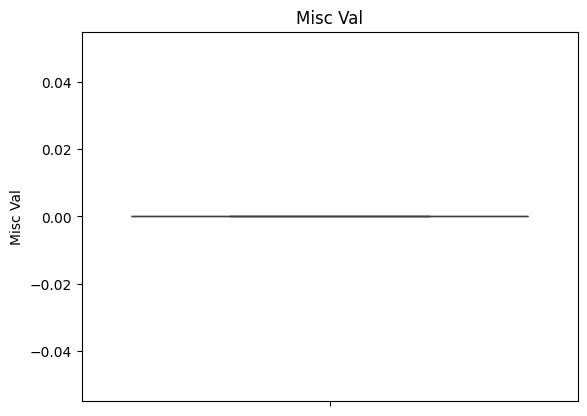

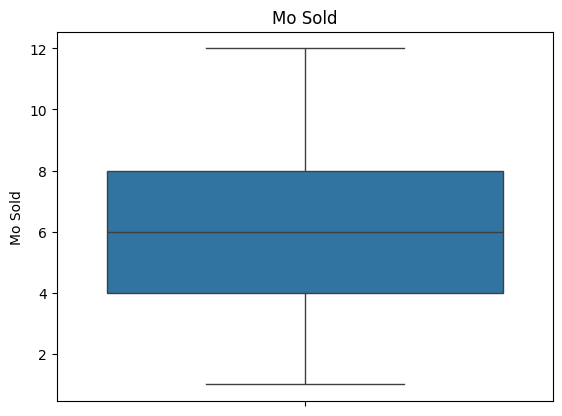

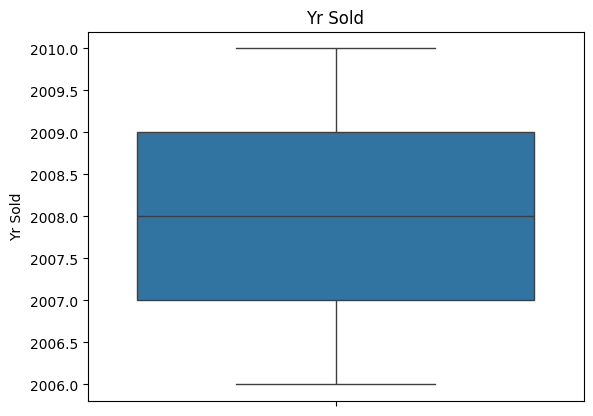

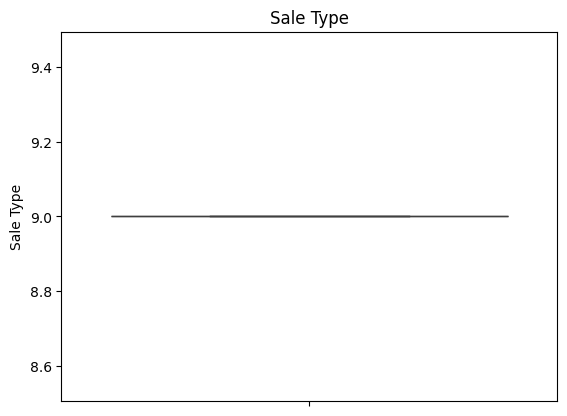

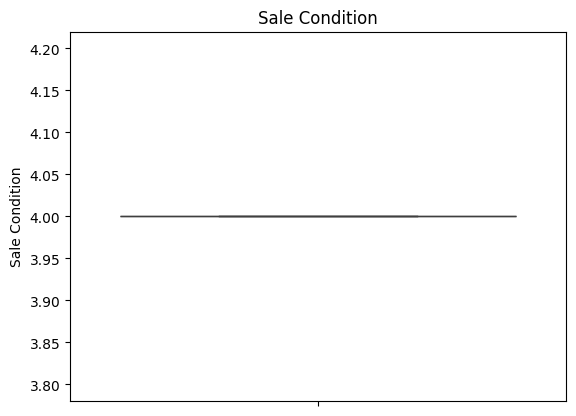

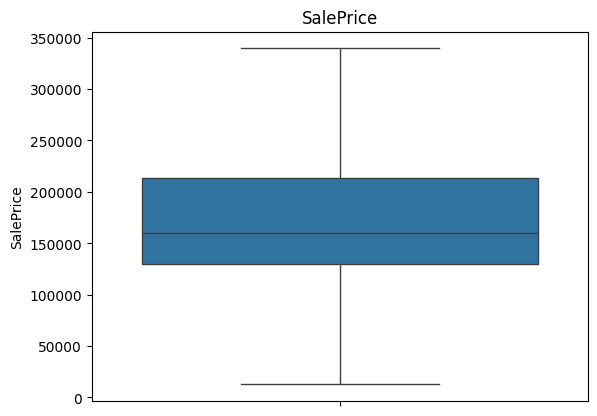

In [19]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

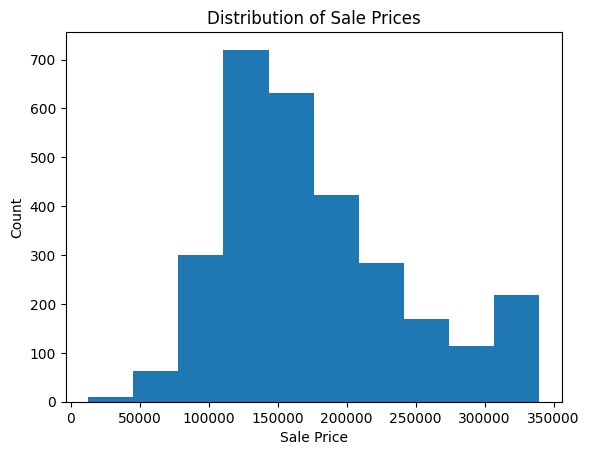

In [20]:
plt.hist(df["SalePrice"])
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Prices")
plt.show()

In [21]:
x = df.drop(columns="SalePrice")
x

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,526301100.0,20.0,5.0,105.0,17727.75,1.0,0.0,3.0,0.0,0.0,...,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,9.0,4.0
1,526350040.0,20.0,5.0,80.0,11622.00,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,9.0,4.0
2,526351010.0,20.0,5.0,81.0,14267.00,1.0,0.0,3.0,0.0,0.0,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,9.0,4.0
3,526353030.0,20.0,5.0,93.0,11160.00,1.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,9.0,4.0
4,527105010.0,60.0,5.0,74.0,13830.00,1.0,0.0,3.0,0.0,4.0,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080.0,80.0,5.0,37.0,7937.00,1.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,9.0,4.0
2926,923276100.0,20.0,5.0,68.0,8885.00,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,9.0,4.0
2927,923400125.0,85.0,5.0,62.0,10441.00,1.0,3.0,3.0,0.0,4.0,...,32.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,9.0,4.0
2928,924100070.0,20.0,5.0,77.0,10010.00,1.0,3.0,3.0,0.0,4.0,...,38.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,9.0,4.0


In [22]:
y = pd.DataFrame(df["SalePrice"])
y

,SalePrice
0,215000.0
1,105000.0
2,172000.0
3,244000.0
4,189900.0
...,...
2925,142500.0
2926,131000.0
2927,132000.0
2928,170000.0


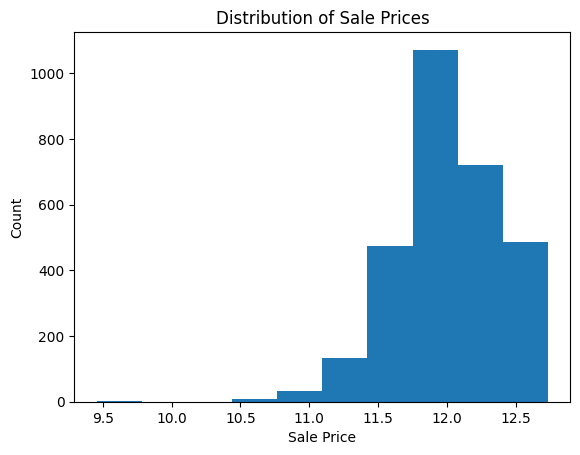

In [23]:
y = np.log1p(y)
plt.hist(y)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Prices")
plt.show()

# Importance of Features

<function matplotlib.pyplot.show(close=None, block=None)>

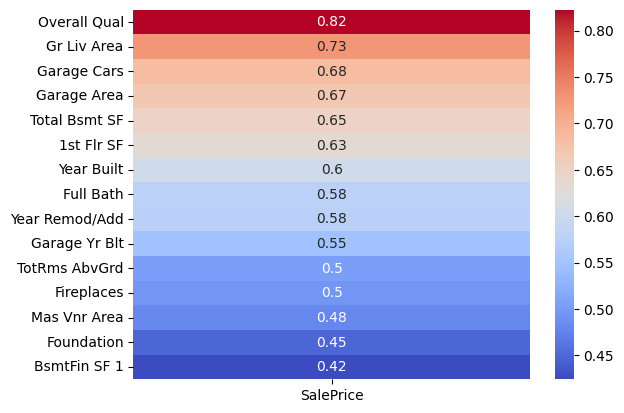

In [24]:
corr = df.corr()

label_corr = corr["SalePrice"]

label_corr_filtered = label_corr[(label_corr > 0.2) & (label_corr < 1)].sort_values(ascending=False).head(15).to_frame()
sns.heatmap(label_corr_filtered ,  annot=True, cmap="coolwarm")
plt.show

# Splite Data

In [25]:
selected_features = label_corr_filtered.index
selected_features

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces',
       'Mas Vnr Area', 'Foundation', 'BsmtFin SF 1'],
      dtype='object')

In [26]:
for col in selected_features:
    print(f"Max for {col} = {x[col].max()} and min = {x[col].min()}")

Max for Overall Qual = 10.0 and min = 2.0
Max for Gr Liv Area = 2667.875 and min = 334.0
Max for Garage Cars = 3.5 and min = 0.0
Max for Garage Area = 960.0 and min = 0.0
Max for Total Bsmt SF = 2064.25 and min = 30.25
Max for 1st Flr SF = 2145.625 and min = 334.0
Max for Year Built = 2010.0 and min = 1883.5
Max for Full Bath = 3.5 and min = 0.0
Max for Year Remod/Add = 2010.0 and min = 1950.0
Max for Garage Yr Blt = 2059.5 and min = 1903.5
Max for TotRms AbvGrd = 10.0 and min = 2.0
Max for Fireplaces = 2.5 and min = 0.0
Max for Mas Vnr Area = 406.875 and min = 0.0
Max for Foundation = 3.5 and min = 0.0
Max for BsmtFin SF 1 = 1835.0 and min = 0.0


In [27]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(df[selected_features]) , columns = selected_features)

In [28]:
x

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt,TotRms AbvGrd,Fireplaces,Mas Vnr Area,Foundation,BsmtFin SF 1
0,-0.068437,0.355697,0.314516,0.275741,0.085158,1.380735,-0.376586,-1.028587,-1.163488,-0.741513,0.389634,2.196513,0.184817,-0.546784,0.455614
1,-0.779508,-1.267407,-1.016215,1.245506,-0.400534,-0.705915,-0.343468,-1.028587,-1.115542,-0.700640,-0.947167,-0.934112,-0.658307,-0.546784,0.065132
2,-0.068437,-0.342665,-1.016215,-0.761236,0.695953,0.482926,-0.442821,-1.028587,-1.259380,-0.823260,-0.278766,-0.934112,0.154706,-0.546784,1.104133
3,0.642633,1.325288,0.314516,0.246936,2.499513,2.627234,-0.111645,0.789121,-0.779919,-0.414528,1.058034,2.196513,-0.658307,-0.546784,1.428393
4,-0.779508,0.298034,0.314516,0.054903,-0.287696,-0.618056,0.848766,0.789121,0.658466,0.770794,-0.278766,0.631200,-0.658307,0.862254,0.802709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.068437,-1.038891,0.314516,0.563790,-0.103722,-0.412137,0.418237,-1.028587,-0.012780,0.239443,-0.278766,-0.934112,-0.658307,-0.546784,0.866647
2926,-0.779508,-1.254593,0.314516,0.064505,-0.444687,-0.689442,0.385120,-1.028587,-0.060726,0.198570,-0.947167,-0.934112,-0.658307,-0.546784,-0.316215
2927,-0.779508,-1.109368,-2.346945,-2.259092,-0.326944,-0.502741,0.683178,-1.028587,0.370789,0.035077,-0.278766,-0.934112,-0.658307,0.862254,-0.234008
2928,-0.779508,-0.214525,0.314516,-0.252349,0.843132,0.647662,0.087061,-1.028587,-0.444296,-0.128416,-0.278766,0.631200,-0.658307,-0.546784,1.442094


In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state=45) 

# Model Train

In [30]:
models = [KNeighborsRegressor() , DecisionTreeRegressor() , SVR() , XGBRegressor() ,RandomForestRegressor()]
for i in models:
    model = i
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Results for {i}")
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

Results for KNeighborsRegressor()
MAE: 0.1087
RMSE: 0.1687
R²: 0.8183
Results for DecisionTreeRegressor()
MAE: 0.1273
RMSE: 0.1927
R²: 0.7629


c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for SVR()
MAE: 0.0975
RMSE: 0.1538
R²: 0.8491
Results for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
MAE: 0.0952
RMSE: 0.1418
R²: 0.8716


c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for RandomForestRegressor()
MAE: 0.0950
RMSE: 0.1417
R²: 0.8718


In [31]:
model = RandomForestRegressor()

params = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10]
}


grid = GridSearchCV(model , params , scoring='neg_root_mean_squared_error' , cv = 5)
grid.fit(x_train, y_train)

c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConvers

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [32]:
print("Best Parameters:", grid.best_params_)
print("Best Score (neg RMSE):", grid.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Best Score (neg RMSE): -0.14257638736090264


# Best Model Training

In [33]:
best_model_1 = RandomForestRegressor(
    max_depth= None , 
    min_samples_split= 5 , 
    n_estimators= 300 ,
    random_state= 12
)
best_model_1.fit(x_train, y_train)
y_pred = best_model_1.predict(x_test)

c:\Users\zwzyz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Evaluate Model

In [34]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0945
RMSE: 0.1422
R²: 0.8709


In [35]:
model = XGBRegressor()

params = {
    'max_depth': range(3 , 6 , 1),
    'learning_rate': [0.05 , 0.04 , 0.03 , 0.02 , 0.01 , 0.1],
    'n_estimators': [200, 500]
}


grid = GridSearchCV(model , params , scoring='neg_root_mean_squared_error' , cv = 5)
grid.fit(x_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.04, ...], 'max_depth': range(3, 6), 'n_estimators': [200, 500]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [36]:
print("Best Parameters:", grid.best_params_)
print("Best Score (neg RMSE):", grid.best_score_)

Best Parameters: {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 500}
Best Score (neg RMSE): -0.1358164668083191


In [37]:
best_model = XGBRegressor(
    learning_rate=0.04,
    max_depth=3,
    n_estimators=500
)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0907
RMSE: 0.1347
R²: 0.8842


# Save Model

In [39]:
joblib.dump(best_model , 'house_price_model.pkl')
joblib.dump(sc , 'scaler.pkl')
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [40]:

for col in encoders:
    le = encoders[col]
    print(f"Column: {col}")
    print(f"Classes: {le.classes_}\n")


Column: MS Zoning
Classes: ['A (agr)' 'C (all)' 'FV' 'I (all)' 'RH' 'RL' 'RM']

Column: Street
Classes: ['Grvl' 'Pave']

Column: Lot Shape
Classes: ['IR1' 'IR2' 'IR3' 'Reg']

Column: Land Contour
Classes: ['Bnk' 'HLS' 'Low' 'Lvl']

Column: Utilities
Classes: ['AllPub' 'NoSeWa' 'NoSewr']

Column: Lot Config
Classes: ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']

Column: Land Slope
Classes: ['Gtl' 'Mod' 'Sev']

Column: Neighborhood
Classes: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'Greens' 'GrnHill' 'IDOTRR' 'Landmrk' 'MeadowV'
 'Mitchel' 'NAmes' 'NPkVill' 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown'
 'SWISU' 'Sawyer' 'SawyerW' 'Somerst' 'StoneBr' 'Timber' 'Veenker']

Column: Condition 1
Classes: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']

Column: Condition 2
Classes: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']

Column: Bldg Type
Classes: ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']

Column: House Style
Clas

In [41]:
best_model.feature_names_in_

array(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces',
       'Mas Vnr Area', 'Foundation', 'BsmtFin SF 1'], dtype='<U14')

## Streamlit Interface

![Screenshot 2025-12-20 230042.png](<attachment:Screenshot 2025-12-20 230042.png>)
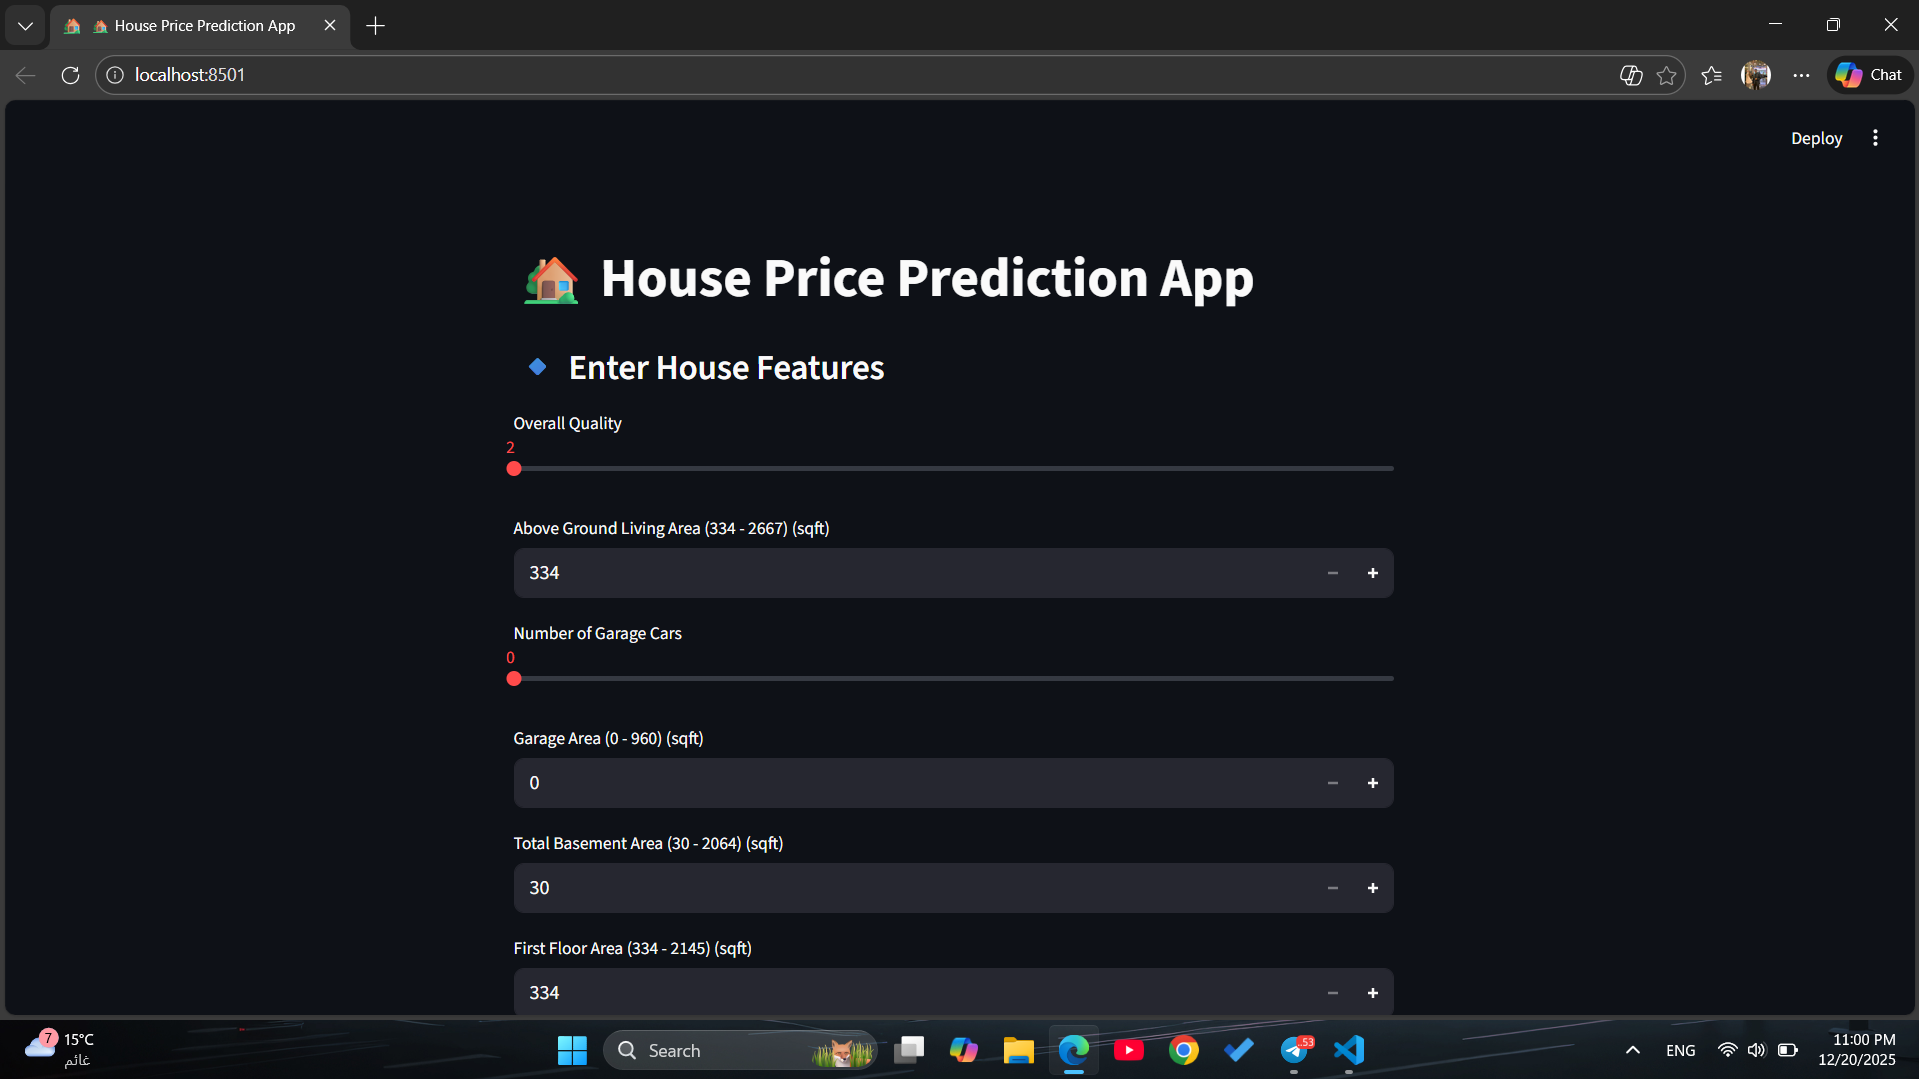

![Screenshot 2025-12-20 230058.png](<attachment:Screenshot 2025-12-20 230058.png>)
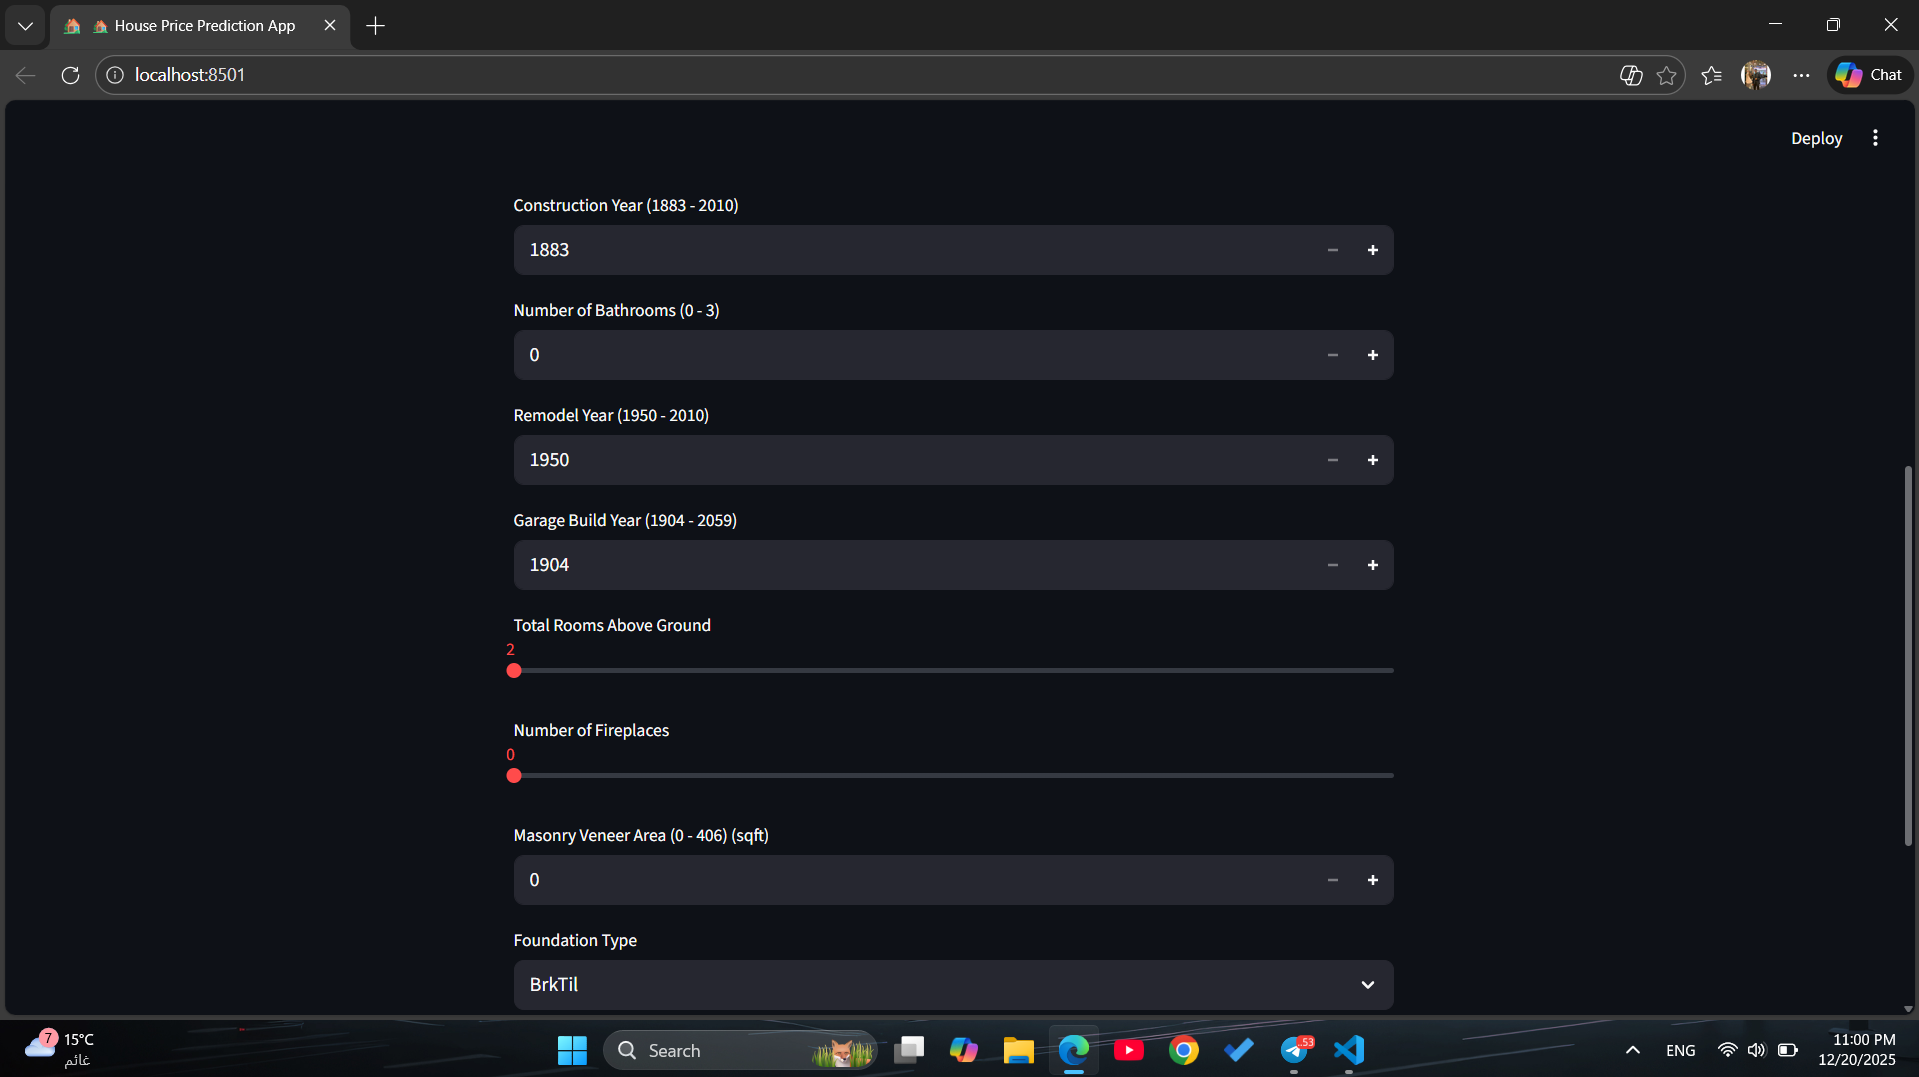

![Screenshot 2025-12-20 230114.png](<attachment:Screenshot 2025-12-20 230114.png>)
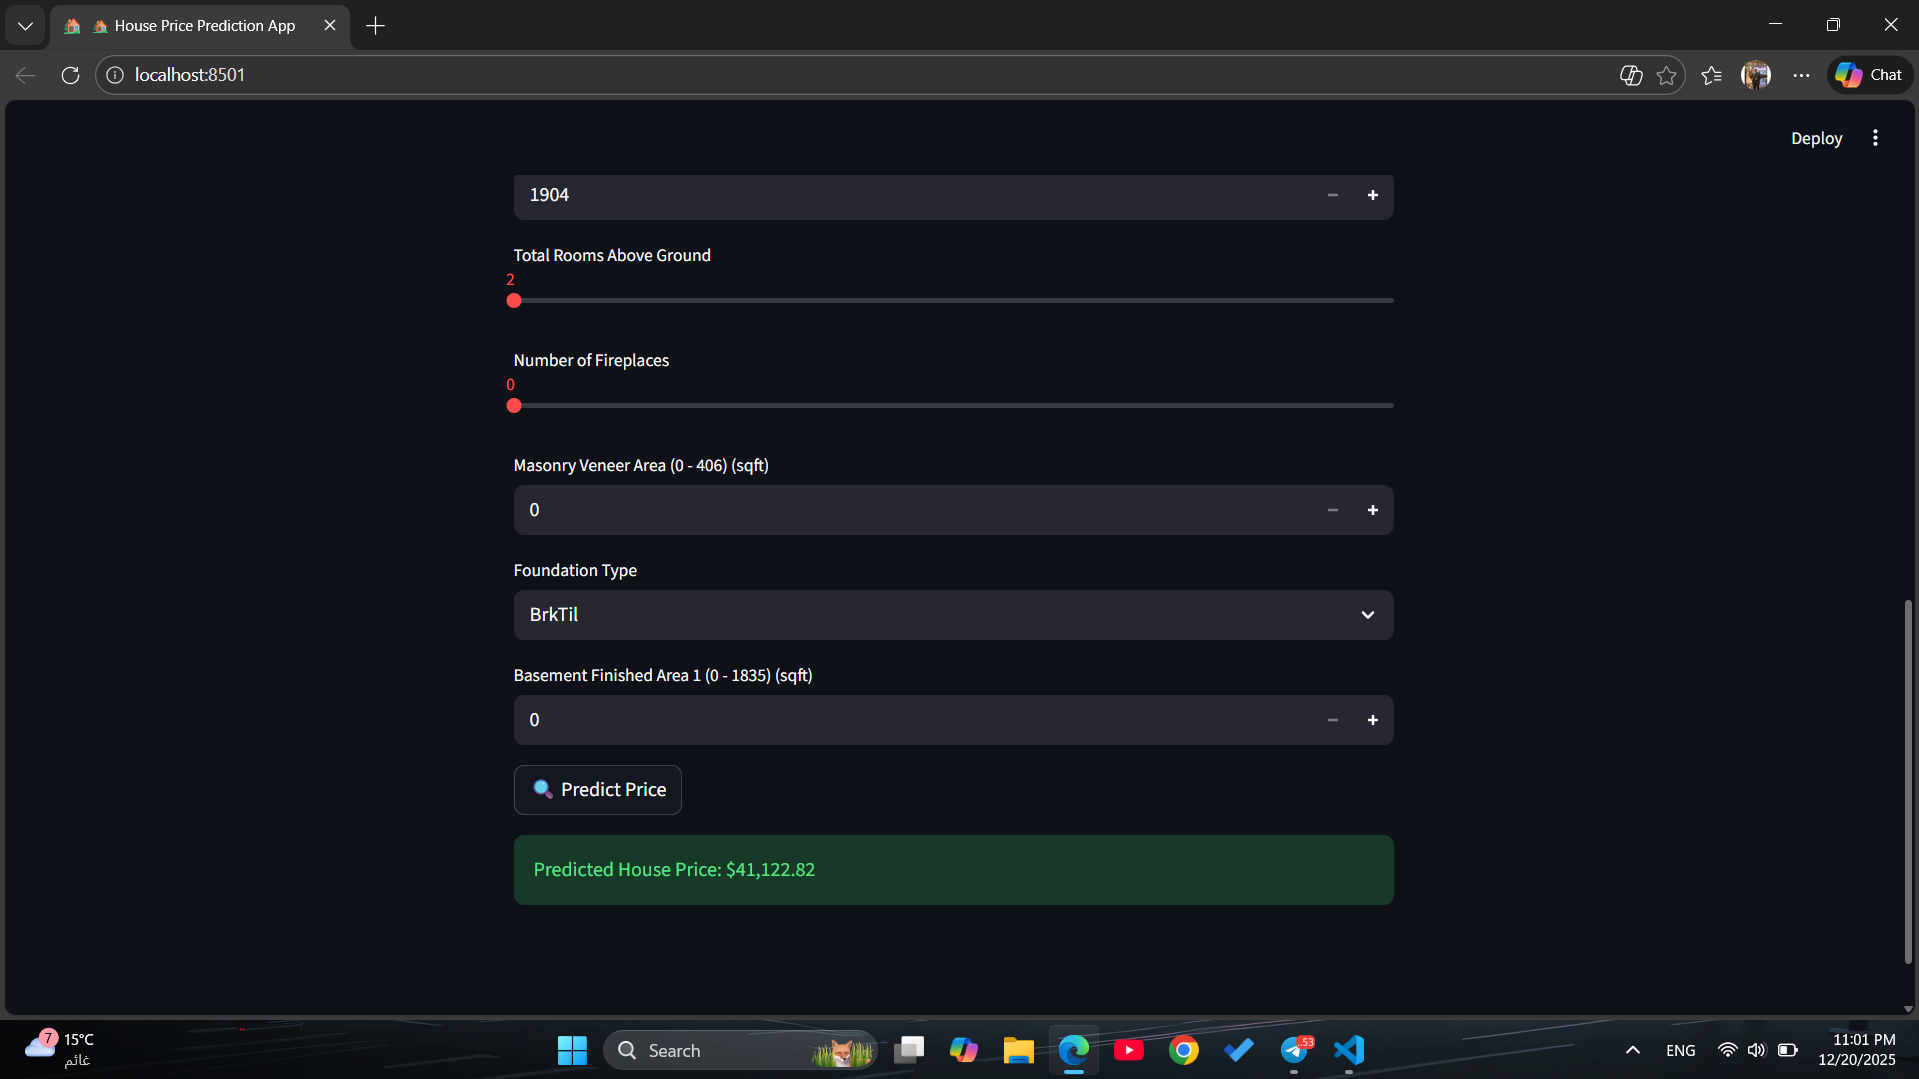